<a href="https://colab.research.google.com/github/AbiramiRathina/roi_based_program_selection/blob/abirami/project_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!jupyter nbconvert --ClearWidgetsNotebook --clear-output --inplace "/content/drive/MyDrive/project_big_data.ipynb"

usage: jupyter-nbconvert [-h] [--debug] [--show-config] [--show-config-json]
                         [--generate-config] [-y] [--execute] [--allow-errors]
                         [--stdin] [--stdout] [--inplace] [--clear-output]
                         [--coalesce-streams] [--no-prompt] [--no-input]
                         [--allow-chromium-download]
                         [--disable-chromium-sandbox] [--show-input]
                         [--embed-images] [--sanitize-html]
                         [--log-level NbConvertApp.log_level]
                         [--config NbConvertApp.config_file]
                         [--to NbConvertApp.export_format]
                         [--template TemplateExporter.template_name]
                         [--template-file TemplateExporter.template_file]
                         [--theme HTMLExporter.theme]
                         [--sanitize_html HTMLExporter.sanitize_html]
                         [--writer NbConvertApp.writer_class]
   

In [ ]:
# pd.set_option('display.max_rows', 5000) #Since we have alot of columns to analyse, setting this window to be higher than usual

# Dataset Description
*Dataset documentation: https://collegescorecard.ed.gov/data/data-documentation/*

*Dataset: https://collegescorecard.ed.gov/data/*

### Overview
In our project, we use two datasets: an institution-level dataset and a cohort (field-of-study)–level dataset. Combined, these data sources help us estimate the return on investment (ROI) of academic programs. Given a list of university choices, a student will be able to compare multiple programs based on ROI.

For simplicity, we restrict our analysis to data from the year 2025. Although we recognize that a fully informed decision requires examining trends across multiple years, the large dataset size and limitations in computational resources make multi-year analysis difficult. Therefore, we proceed with only the 2025 data. The first step in our project is to understand the structure and content of the data.

Since both datasets are large, instead of mounting Google Drive in Colab, we host them via public Google Drive links and load them directly. This approach saves time and ensures that the data is easily accessible to anyone running the project.

### Dataset 1: Institution-Level Data

This dataset contains information on approximately 6,429 institutions and 3,306 features. The data can be grouped into the following categories:

(i) Institutional Demographics

Institution name, location, control (public/private), sector

Campus type, degree levels offered

Admissions information, acceptance rates

Program offerings (CIP codes)

(ii) Cost & Affordability Indicators

Tuition and fees (in-state, out-of-state)

Net price after grants

Average annual cost by family income bracket

Cost of attendance and living expenses

(iii) Financial Aid & Debt

Percentage of students receiving Pell Grants

Average student loan amounts

Median debt at graduation

Repayment and default rates

(iv) Student Demographics

Enrollment numbers

Gender and race/ethnicity distributions

First-generation status

Part-time vs. full-time enrollment

(v) Academic Performance

Retention rates

Completion and graduation rates

Transfer-out and withdrawal rates

(vi) Earnings & Outcomes

Median earnings 1, 2, 6, and 10 years after entry

Employment rates

Loan repayment progress

Earnings by program or award level

Important notes:

Several fields contain NULL or privacy-suppressed values (e.g., “PrivacySuppressed”).

Some variables are only available for specific years.

Certain earnings metrics lag by several years due to tax data availability.

Proper interpretation requires understanding cohort definitions (e.g., first-time students, completers, non-completers).

### Dataset 2: Field-of-Study (Cohort-Level) Data

This dataset contains approximately 229,188 rows and 174 columns. Although the number of columns is smaller than in the institution dataset, the dimensionality remains significant. After reviewing the documentation, the following column groups help structure and understand the data:

(i) Identification & Keys

Institution-level identifiers
Program identifiers (CIP code, credential level)

(ii) Academic Program Information

Characteristics of the program or field of study

(iii) Student Count & Cohort Size

(iv) Cost & Tuition Information

(v) Debt, Loan & Repayment Metrics

(vi) Earnings & Employment Outcomes

(vii) Loan Repayment & Default Indicators

Useful for assessing program-level financial risk

(viii) Demographics

(ix) Program-level demographic details (gender, race, etc.)

(x) Institution Characteristics

Helpful when merging with the institution-level dataset

As with the institution data, this dataset contains many privacy-suppressed values (PS) and null or missing entries that require cleaning.

### EDA

#### Dataset 1: Institute level data

In [ ]:
url_institutes = "https://drive.google.com/uc?export=download&id=1SIZufYNWCC91scwafSx3LYOAMEHyfvrr" # https://drive.google.com/file/d/1SIZufYNWCC91scwafSx3LYOAMEHyfvrr/view?usp=sharing"
df_institutes = pd.read_csv(url_institutes)

/tmp/ipython-input-1537099505.py:2: DtypeWarning: Columns (9,1407,1408,1431,1432,1532,1537,1538,1539,1540,1542,1546,1589,1601,1602,1606,1608,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1653,1679,1690,1692,1697,1700,1702,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df_institutes = pd.read_csv(url_institutes)


In [ ]:
df_institutes

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,4
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0,5
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,4
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,49382201,4283601.0,42836.0,College Unbound - Newport/Aquidneck Island,Newport,RI,028400000,New England Commission on Higher Education,https://www.collegeunbound.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
6425,49425001,2609404.0,26094.0,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,443333631,Accrediting Commission of Career Schools and C...,https://www.valley.edu/,NaN,...,NaN,0.4651,26087.0,37545.0,NaN,NaN,28205.0,27499.0,NaN,15
6426,49501301,4247201.0,42472.0,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,85326-5705,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
6427,49501302,4247202.0,42472.0,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,85027-0000,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13


In [ ]:
df_institutes.shape

(6429, 3306)

As we can see we have 6429 rows and 3306 columns, this is alot of features, for our problem statement information regarding the strength of the program(value it holds in terms of roi) is what trully matters

In [ ]:
df_institutes.dtypes.unique()


array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

we can see tat we have both numeric and object datatypes, that means we will have to extract stats for each differently

First we'll describle information about the numeric columns

In [ ]:
df_institutes.describe().T

,count,mean,std,min,25%,50%,75%,max
UNITID,6429.0,2.355496e+06,8.043861e+06,100654.0,174570.00,229540.0,458955.00,49664501.0
OPEID,6405.0,1.762653e+06,2.173129e+06,100200.0,304800.00,1019817.0,3101900.00,82098816.0
OPEID6,6405.0,1.714251e+04,1.533956e+04,1002.0,3037.00,10198.0,30987.00,43098.0
SCH_DEG,5926.0,1.961019e+00,9.019431e-01,1.0,1.00,2.0,3.00,3.0
HCM2,6429.0,5.599627e-03,7.462665e-02,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
MD_EARN_WNE_INDEP0_P11,4615.0,4.215305e+04,1.554240e+04,9834.0,31734.50,39402.0,49877.00,128900.0
MD_EARN_WNE_INDEP1_P11,4619.0,4.043234e+04,1.590708e+04,9978.0,29054.00,37751.0,48690.00,155413.0
MD_EARN_WNE_MALE0_P11,4828.0,3.839875e+04,1.508965e+04,10586.0,27895.25,35233.0,45567.25,126750.0
MD_EARN_WNE_MALE1_P11,4226.0,4.918016e+04,1.730486e+04,8364.0,38631.75,46595.5,57097.75,248999.0


In [ ]:
df_institutes.describe(include="object").T

,count,unique,top,freq
INSTNM,6429,6321,Cortiva Institute,6
CITY,6429,2362,New York,75
STABBR,6429,59,CA,672
ZIP,6429,5819,00961,6
ACCREDAGENCY,6225,40,Higher Learning Commission,1153
...,...,...,...,...
CONTROL_PEPS,6405,3,Proprietary,2411
ADM_RATE_SUPP,1946,1504,PS,174
ADDR,5921,5868,One College Drive,6
PCTPELL_DCS_POOLED_SUPP,5628,4303,PS,69


In [ ]:
df_institutes.nunique().sort_values(ascending=False)

,0
UNITID,6429
OPEID,6377
INSTNM,6321
LATITUDE,5874
LONGITUDE,5873
...,...
LNFAMINC,0
LNFAMINC_IND,0
UG,0
UG_AIANOLD,0


we definately have a lot of data, that just cant be manually double checked

Possible steps to reduce thew number of features for numeric columns is to first drop columns with null values, then we can also drop columns that have only one unique value, we seem to have a few of those.

For categorical data we can observe that the top value for alot of columns is PS(meaning these are not disclosed for privacy reasons, that means we might have to drop these columns as they don't hold much value)

we also see that with regards to unique values we have multiple identifies for institues but the UNITID and INSTNM are enough identifiers. There also many columns that have 0-1 unique values, these dont add any value to our model

In [ ]:
empty_cols = df_institutes.columns[df_institutes.isna().all()]
len(empty_cols)

75

In [ ]:
constant_cols = df_institutes.columns[df_institutes.nunique(dropna=True) <= 1]
len(constant_cols)

193

In [ ]:
obj_desc = df_institutes.describe(include='object').T
ps_cols = obj_desc[obj_desc['top'] == 'PS'].index.tolist()
len(ps_cols)

2319

In [ ]:
bad_cols = set(empty_cols) | set(constant_cols) | set(ps_cols)
len(bad_cols)

2400

we have 2400 columns that can be removed

In [ ]:
df_institutes_cleaned = df_institutes.drop(columns=list(bad_cols))
df_institutes_cleaned.shape


(6429, 906)

In [ ]:
df_institutes.shape

(6429, 3306)

We have successfully reduced the number of featues from 3306 to 906

In [ ]:
df_institutes_cleaned.nunique().sort_values(ascending=False)

,0
UNITID,6429
OPEID,6377
INSTNM,6321
LATITUDE,5874
LONGITUDE,5873
...,...
AANAPII,2
HSI,2
NANTI,2
MENONLY,2


From the abouve table we can see that there are some columns that provide too much information that might not be needed like:OPEID(Office of Postsecondary Education Identifier), LATITUDE, LONGITUDE, ADDT, ZIP, FEDSCHCD (A type of fedral aid code), INSTURL, TUITFTE, NPCURL, OPEID6, INEXPFTE

And some columns related to demografic information, that dont hold much value for our problem. We can remove these

Any column with cip in the begining again dont matter much here as these are course level completion rates, this is not required for our project

Columns tha have HH in it, are household information, again of very less value in our project context, eg: LN_MEDIAN_HH_INC

POOLYRS* columns only tell you how many years of data were pooled to calculate certain repayment variables. They are metadata, not features. They do not help with prediction and do not describe the institution or program. Examples of such columns:POOLYRS100, POOLYRS1, POOLYRS10, POOLYRS5

We can remove MTHCMP1 and similar columns (MTHCMP2 … MTHCMP6). These columns only describe the average months to complete the institution’s top programs, not the specific program you’re evaluating. They do not contribute to ROI modeling and mostly add noise, so dropping them is appropriate.

In [ ]:
cols_to_remove_manual = [
    'OPEID', 'LATITUDE', 'LONGITUDE', 'ADDR', 'ZIP', 'FEDSCHCD',
    'INSTURL', 'TUITFTE', 'NPCURL', 'OPEID6', 'INEXPFTE'
]

df_institutes_cleaned = df_institutes_cleaned.drop(columns=[col for col in cols_to_remove_manual if col in df_institutes_cleaned.columns])


In [ ]:
df_institutes_cleaned.shape

(6429, 895)

In [ ]:
demographic_keywords = [
    "male", "female", "men", "women",
    "black", "white", "hisp", "asian",
    "race", "ethnic", "minority", "cip", "hh", "poolyrs", "mthcmp"
]

demographic_cols = [
    c for c in df_institutes_cleaned.columns
    if any(k in c.lower() for k in demographic_keywords)
]

print("Columns to remove:", demographic_cols)


Columns to remove: ['MENONLY', 'WOMENONLY', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC', 'CIP01CERT4', 'CIP01BACHL', 'CIP03CERT1', 'CIP03CERT2', 'CIP03ASSOC', 'CIP03CERT4', 'CIP03BACHL', 'CIP04CERT1', 'CIP04CERT2', 'CIP04ASSOC', 'CIP04CERT4', 'CIP04BACHL', 'CIP05CERT1', 'CIP05CERT2', 'CIP05ASSOC', 'CIP05CERT4', 'CIP05BACHL', 'CIP09CERT1', 'CIP09CERT2', 'CIP09ASSOC', 'CIP09CERT4', 'CIP09BACHL', 'CIP10CERT1', 'CIP10CERT2', 'CIP10ASSOC', 'CIP10CERT4', 'CIP10BACHL', 'CIP11CERT1', 'CIP11CERT2', 'CIP11ASSOC', 'CIP11CERT4', 'CIP11BACHL', 'CIP12CERT1', 'CIP12CERT2', 'CIP12ASSOC', 'CIP12CERT4', 'CIP12BACHL', 'CIP13CERT1', 'C

In [ ]:
len(set(demographic_cols))

464

In [ ]:
df_institutes_cleaned = df_institutes_cleaned.drop(columns=[col for col in demographic_cols if col in df_institutes_cleaned.columns])


In [ ]:
df_institutes_cleaned.shape

(6429, 431)

In [ ]:
df_institutes_cleaned.nunique().sort_values(ascending=False)

,0
UNITID,6429
INSTNM,6321
MD_EARN_WNE_1YR,4116
MD_EARN_WNE_5YR,4072
PCTFLOAN_DCS_POOLED_SUPP,4045
...,...
NANTI,2
HSI,2
OPENADMP,2
DISTANCEONLY,2


Lets compute a few extra columns that encapsualte important information related to cost. finally lets pick only features that would help us predict roi

In [ ]:
df_inst = df_institutes_cleaned.copy()

# TUITION_BASE:
# Use program tuition if available,
# otherwise use in-state tuition,
# otherwise use out-of-state tuition.
df_inst["TUITION_BASE"] = (
    df_inst["TUITIONFEE_PROG"]
        .fillna(df_inst["TUITIONFEE_IN"])
        .fillna(df_inst["TUITIONFEE_OUT"])
)

# NET_PRICE:
# Private schools use NPT4_PRIV,
# if missing, fall back to NPT4_PUB.
df_inst["NET_PRICE"] = (
    df_inst["NPT4_PRIV"]
        .fillna(df_inst["NPT4_PUB"])
)

# TOTAL_COST:
# Take NET_PRICE if available,
# else use TUITION_BASE,
# else 0.
# Then add room & board cost (or 0 if missing).
df_inst["TOTAL_COST"] = (
    df_inst["NET_PRICE"]
        .fillna(df_inst["TUITION_BASE"])
        .fillna(0) +
    df_inst["ROOMBOARD_ON"].fillna(0)
)

roi_cols = [
    "UNITID", "INSTNM", "CONTROL", "TOTAL_COST"
]


df_inst = df_inst[[c for c in roi_cols if c in df_inst.columns]]


In [ ]:
df_inst.isna().sum().sort_values(ascending=False)

,0
UNITID,0
INSTNM,0
CONTROL,0
TOTAL_COST,0


In [ ]:
df_inst

,UNITID,INSTNM,CONTROL,TOTAL_COST
0,100654,Alabama A & M University,1,25961.0
1,100663,University of Alabama at Birmingham,1,31317.0
2,100690,Amridge University,2,0.0
3,100706,University of Alabama in Huntsville,1,31002.0
4,100724,Alabama State University,1,21579.0
...,...,...,...,...
6424,49382201,College Unbound - Newport/Aquidneck Island,2,10488.0
6425,49425001,Valley College - Fairlawn - School of Nursing,3,18625.0
6426,49501301,Western Maricopa Education Center - Southwest ...,1,0.0
6427,49501302,Western Maricopa Education Center - Northeast ...,1,0.0


UNITID: Unique institution identifier assigned by the U.S. Department of Education (IPEDS).

INSTNM: Official name of the institution.

CONTROL: Type of institutional control (1 = Public, 2 = Private nonprofit, 3 = Private for-profit).

PREDDEG: Predominant degree level awarded by the institution (associate, bachelor’s, or graduate).

TOTAL_COST: Combined annual educational cost calculated from net price or tuition plus room and board.


In [ ]:
df_institutes_cleaned_final = df_inst.copy()

In [ ]:
df_institutes_cleaned_final.describe().T

,count,mean,std,min,25%,50%,75%,max
UNITID,6429.0,2.355496e+06,8.043861e+06,100654.0,174570.0,229540.0,458955.0,49664501.0
CONTROL,6429.0,2.056618e+00,8.325397e-01,1.0,1.0,2.0,3.0,3.0
TOTAL_COST,6429.0,1.927540e+04,1.351596e+04,-3220.0,9033.0,18022.0,27491.0,112070.0


In [ ]:
df_institutes_cleaned_final.describe(include="object").T

,count,unique,top,freq
INSTNM,6429,6321,Cortiva Institute,6


In [ ]:
df_institutes_cleaned_final.nunique().sort_values(ascending=False)

,0
UNITID,6429
INSTNM,6321
TOTAL_COST,5244
CONTROL,3


Now our institues, data looks almost perfect, but for now we are going to stop here, and not reduce the dimentions further, as we'll also have to extract important features from the cohort level information ,merge both tables and produce a final dataset where we will do a final feature selection to confirm the columns most useful

## Lets do the same thing for our cohorts dataset

In [ ]:
url_cohorts = "https://drive.usercontent.google.com/download?id=1dkZwR3JDSTpH9j3oETqIO2L90WSHDgbT&export=download&confirm=t" #https://drive.google.com/file/d/1dkZwR3JDSTpH9j3oETqIO2L90WSHDgbT/view?usp=sharing
df_cohorts = pd.read_csv(url_cohorts)

In [ ]:
df_cohorts

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_PELL_WNE_5YR,EARN_PELL_WNE_MDN_5YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,3.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,4.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229183,NaN,43006,Southeast New Mexico College,Public,1,5201,"Business/Commerce, General.",2,Associate's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229184,NaN,43006,Southeast New Mexico College,Public,1,5203,Accounting and Related Services.,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229185,NaN,43006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229186,NaN,43006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,2,Associate's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


Lets drop nan values

In [ ]:
df_cohorts=df_cohorts.dropna()

In [ ]:
df_cohorts.shape

(171410, 174)

So we have more rows and lesser columns this time, we'll have to reduce the dimentionality ti maybe 20 features first

In [ ]:
df_cohorts.describe().T

,count,mean,std,min,25%,50%,75%,max
UNITID,171410.0,199684.860539,84132.109461,100654.0,148016.0,186371.0,219709.0,496371.0
OPEID6,171410.0,5805.593612,8172.313385,1002.0,1949.0,3009.0,4586.0,43006.0
MAIN,171410.0,0.948469,0.221080,0.0,1.0,1.0,1.0,1.0
CIPCODE,171410.0,3326.847634,1703.094246,100.0,1437.0,4005.0,5106.0,5401.0
CREDLEV,171410.0,3.243381,1.837564,1.0,2.0,3.0,5.0,8.0
IPEDSCOUNT1,171410.0,30.136404,100.750515,0.0,2.0,9.0,26.0,9082.0
IPEDSCOUNT2,171410.0,30.445995,105.566080,0.0,2.0,8.0,26.0,9606.0
DISTANCE,171410.0,1.258147,0.612038,1.0,1.0,1.0,1.0,3.0


Analysing the numeric columns is reletively easier compared to categorical features as they are less in number,

The UNITID is an important key as it will act as our foreign key mapping to UNITID in the institues table--> required

OPEID6 can be used as a numeric code for the institute name, so we can use this instead of INSTNM

MAIN is a binary flag used to identify whether the campus is a main campus or a branch of the main campus/affiliated campus-->could be usefull

CIPCODE	is a numeric code assigned to a major can can be used along with the CIPDESC(name of the course) to identify majors-->we can remove CIPDESC

CREDLEV tells you the type of degree earned for that program (certificate, associate, bachelor’s, master’s, or doctoral).-->we also have a CREDDESC which is a text description of the course, this is more easy for use to undersand, but we'll have to one-hot encode this in order to model the data, instead lets choose to keep CREDLEV and drop CREDDESC

IPEDSCOUNT1: Number of students in the IPEDS Outcome Measures 8-year cohort (full-time, first-time undergraduates).

IPEDSCOUNT2: Number of students in the IPEDS Outcome Measures 8-year cohort (part-time, first-time undergraduates).

DISTANCE: Indicator for whether the institution primarily delivers education through distance (online) learning.--> not requied


Conclusion: we can remove INSTNM, CIPDESC, CREDDESC and DISTANCE from our df_cohorts, but for now lets only remove DISTANCE as the others will be usefull for viisualizing the data and understanding it better



In [ ]:
df_cohorts = df_cohorts.drop(columns=[ "DISTANCE"], errors="ignore")

In [ ]:
df_cohorts.describe(include="object").T

,count,unique,top,freq
INSTNM,171410,5755,The Pennsylvania State University,450
CONTROL,171410,3,Public,107350
CIPDESC,171410,370,"Business Administration, Management and Operat...",5186
CREDDESC,171410,7,Bachelor's Degree,59375
DEBT_ALL_STGP_ANY_N,171410,859,PS,124190
...,...,...,...,...
EARN_MALE_WNE_MDN_5YR,171410,11527,PS,156562
EARN_COUNT_NOMALE_WNE_5YR,171410,631,PS,156447
EARN_NOMALE_WNE_MDN_5YR,171410,11541,PS,156447
EARN_COUNT_HIGH_CRED_5YR,171410,309,PS,161083


We see that alot of columns have the value PS, meaning private information that has'nt been disclosed, this might not be usefull in out case, but we can't completly remove them as we'll hance we must come up with a better solution

Lets first try to coun the number of non PS values and how they look like

In [ ]:
is_ps = df_cohorts.isin(["PS"])
ps_counts = is_ps.sum()

total_rows = len(df_cohorts)

non_ps_counts = total_rows - ps_counts

dtypes = df_cohorts.dtypes

summary = pd.DataFrame({
    "dtype": dtypes,
    "total_rows": total_rows,
    "ps_count": ps_counts,
    "non_ps_count": non_ps_counts
})

summary.sort_values("ps_count", ascending=False)

,dtype,total_rows,ps_count,non_ps_count
DEBT_MALE_PP_EVAL_MDN,object,171410,169886,1524
DEBT_NOTMALE_PP_EVAL_MDN,object,171410,169886,1524
EARN_COUNT_HIGH_CRED_1YR,object,171410,169711,1699
DEBT_MALE_PP_ANY_MDN,object,171410,169431,1979
DEBT_NOTMALE_PP_ANY_MDN,object,171410,169431,1979
...,...,...,...,...
CIPDESC,object,171410,0,171410
CREDDESC,object,171410,0,171410
INSTNM,object,171410,0,171410
OPEID6,int64,171410,0,171410


Now we have aorund 200k rows but for our project we need min of 50k rows, we see that for some cols the number of non PS values are cloese to this 50k range, lets filter them

Our goal is to use features related to debt, earnings and other related features that can help predict roi of a course


Lets try to manually pick out the cols that have more than 50k non_ps values, and check the size of the data

In [ ]:
df_cohorts

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_PELL_WNE_5YR,EARN_PELL_WNE_MDN_5YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,3.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,4.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
5,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,6,Doctoral Degree,2.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
7,100654.0,1002,Alabama A & M University,Public,1,199,"Agriculture, Agriculture Operations, and Relat...",3,Bachelor's Degree,6.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218846,496283.0,23608,Provo College-Idaho Falls Campus,"Private, for-profit",0,5138,"Registered Nursing, Nursing Administration, Nu...",3,Bachelor's Degree,0.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
218849,496292.0,23068,Miller-Motte College-Chattanooga 2,"Private, for-profit",0,4902,Ground Transportation.,1,Undergraduate Certificate or Diploma,0.0,...,PS,PS,16,31181,PS,PS,PS,PS,PS,40
218850,496326.0,21785,Eagle Gate College-Boise Campus,"Private, for-profit",0,5108,Allied Health and Medical Assisting Services.,1,Undergraduate Certificate or Diploma,0.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,63
218851,496326.0,21785,Eagle Gate College-Boise Campus,"Private, for-profit",0,5138,"Registered Nursing, Nursing Administration, Nu...",3,Bachelor's Degree,0.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


In [ ]:
cols_to_extract = [
    "UNITID",
    "OPEID6",
    "IPEDSCOUNT1",
    "CIPCODE",
    "IPEDSCOUNT2",
    "CREDLEV",
    "CREDDESC",
    "CONTROL",
    "CIPDESC",
    "MAIN",
    "EARN_COUNT_NWNE_1YR",
    "EARN_COUNT_NWNE_HI_1YR",
    "EARN_COUNT_NWNE_5YR",
    "EARN_COUNT_NWNE_4YR",
    "BBRR1_FED_COMP_N",
    "DEBT_ALL_STGP_EVAL_N",
    "BBRR2_FED_COMP_N",
    "BBRR4_FED_COMP_N",
    "BBRR3_FED_COMP_N",
    "EARN_CNTOVER150_HI_2YR",
    "EARN_COUNT_WNE_HI_2YR",
    "EARN_COUNT_NWNE_HI_2YR",
    "EARN_MDN_HI_2YR"
]

df_cohort_manual = df_cohorts[cols_to_extract]

In [ ]:
df_cohort_manual

,UNITID,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,CREDDESC,CONTROL,CIPDESC,MAIN,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
2,100654.0,1002,3.0,109,9.0,3,Bachelor's Degree,Public,Animal Sciences.,1,...,2,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,1002,7.0,110,10.0,3,Bachelor's Degree,Public,Food Science and Technology.,1,...,0,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,1002,4.0,110,6.0,5,Master's Degree,Public,Food Science and Technology.,1,...,0,PS,PS,15,12,12,PS,PS,PS,PS
5,100654.0,1002,2.0,110,4.0,6,Doctoral Degree,Public,Food Science and Technology.,1,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
7,100654.0,1002,6.0,199,6.0,3,Bachelor's Degree,Public,"Agriculture, Agriculture Operations, and Relat...",1,...,1,PS,PS,PS,PS,PS,PS,PS,PS,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218846,496283.0,23608,0.0,5138,0.0,3,Bachelor's Degree,"Private, for-profit","Registered Nursing, Nursing Administration, Nu...",0,...,PS,107,PS,11,PS,PS,PS,PS,PS,PS
218849,496292.0,23068,0.0,4902,47.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Ground Transportation.,0,...,8,PS,18,PS,PS,PS,32,43,8,30988
218850,496326.0,21785,0.0,5108,4.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Allied Health and Medical Assisting Services.,0,...,7,48,PS,117,97,96,12,17,2,25658
218851,496326.0,21785,0.0,5138,0.0,3,Bachelor's Degree,"Private, for-profit","Registered Nursing, Nursing Administration, Nu...",0,...,0,100,108,11,PS,PS,PS,PS,PS,PS


In [ ]:
df_cohort_manual.columns

Index(['UNITID', 'OPEID6', 'IPEDSCOUNT1', 'CIPCODE', 'IPEDSCOUNT2', 'CREDLEV',
       'CREDDESC', 'CONTROL', 'CIPDESC', 'MAIN', 'EARN_COUNT_NWNE_1YR',
       'EARN_COUNT_NWNE_HI_1YR', 'EARN_COUNT_NWNE_5YR', 'EARN_COUNT_NWNE_4YR',
       'BBRR1_FED_COMP_N', 'DEBT_ALL_STGP_EVAL_N', 'BBRR2_FED_COMP_N',
       'BBRR4_FED_COMP_N', 'BBRR3_FED_COMP_N', 'EARN_CNTOVER150_HI_2YR',
       'EARN_COUNT_WNE_HI_2YR', 'EARN_COUNT_NWNE_HI_2YR', 'EARN_MDN_HI_2YR'],
      dtype='object')

lets drop rows with ps in it

In [ ]:
df_cohort_manual_non_ps = df_cohort_manual[~df_cohort_manual.isin(["PS"]).any(axis=1)]


In [ ]:
df_cohort_manual_non_ps

,UNITID,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,CREDDESC,CONTROL,CIPDESC,MAIN,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
15,100654.0,1002,23.0,1002,16.0,3,Bachelor's Degree,Public,Audiovisual Communications Technologies/Techni...,1,...,0,48,45,18,16,16,6,12,0,20102
16,100654.0,1002,20.0,1101,37.0,3,Bachelor's Degree,Public,"Computer and Information Sciences, General.",1,...,0,46,41,26,29,29,29,31,0,52107
28,100654.0,1002,18.0,1408,7.0,3,Bachelor's Degree,Public,Civil Engineering.,1,...,0,10,12,12,15,15,12,12,0,47260
29,100654.0,1002,33.0,1410,20.0,3,Bachelor's Degree,Public,"Electrical, Electronics and Communications Eng...",1,...,4,43,50,23,22,22,28,29,2,61303
30,100654.0,1002,41.0,1419,41.0,3,Bachelor's Degree,Public,Mechanical Engineering.,1,...,2,39,53,23,26,26,19,23,0,52107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218828,495998.0,21207,82.0,5108,57.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Allied Health and Medical Assisting Services.,0,...,112,2097,2325,1311,1098,1090,491,797,84,21861
218829,495998.0,21207,19.0,5204,11.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Business Operations Support and Assistant Serv...,0,...,17,258,306,135,113,113,36,60,11,22094
218844,496265.0,7839,0.0,4805,1.0,2,Associate's Degree,"Private, for-profit",Precision Metal Working.,0,...,7,25,20,33,54,54,35,50,5,30409
218845,496283.0,23608,0.0,5108,4.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Allied Health and Medical Assisting Services.,0,...,3,30,22,55,35,35,9,13,0,23456


This is giving us only 36k rows, that means there are some rows, where there is only one PS value and the others are available, lets loosen this condition a bit and remove only rows that have more than 5 ps values

In [ ]:
ps_count_per_row = df_cohort_manual.isin(["PS"]).sum(axis=1)

df_cohort_filtered = df_cohort_manual[ps_count_per_row <= 5]

In [ ]:
df_cohort_filtered

,UNITID,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,CREDDESC,CONTROL,CIPDESC,MAIN,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
12,100654.0,1002,8.0,403,6.0,5,Master's Degree,Public,"City/Urban, Community and Regional Planning.",1,...,0,PS,PS,PS,10,10,12,12,0,47260
15,100654.0,1002,23.0,1002,16.0,3,Bachelor's Degree,Public,Audiovisual Communications Technologies/Techni...,1,...,0,48,45,18,16,16,6,12,0,20102
16,100654.0,1002,20.0,1101,37.0,3,Bachelor's Degree,Public,"Computer and Information Sciences, General.",1,...,0,46,41,26,29,29,29,31,0,52107
17,100654.0,1002,9.0,1101,7.0,5,Master's Degree,Public,"Computer and Information Sciences, General.",1,...,0,10,11,13,12,12,PS,PS,PS,PS
20,100654.0,1002,1.0,1304,1.0,5,Master's Degree,Public,Educational Administration and Supervision.,1,...,2,PS,PS,15,20,20,8,11,0,50231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218844,496265.0,7839,0.0,4805,1.0,2,Associate's Degree,"Private, for-profit",Precision Metal Working.,0,...,7,25,20,33,54,54,35,50,5,30409
218845,496283.0,23608,0.0,5108,4.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Allied Health and Medical Assisting Services.,0,...,3,30,22,55,35,35,9,13,0,23456
218849,496292.0,23068,0.0,4902,47.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Ground Transportation.,0,...,8,PS,18,PS,PS,PS,32,43,8,30988
218850,496326.0,21785,0.0,5108,4.0,1,Undergraduate Certificate or Diploma,"Private, for-profit",Allied Health and Medical Assisting Services.,0,...,7,48,PS,117,97,96,12,17,2,25658


This looks good enough, lets now impute missing PS values using SimpleImputed

In [ ]:
df_cohort_filtered = df_cohort_filtered.replace(["PS"], np.nan) #sub PS values with nan

Since imputation must be done seperately for numeric and cat cols lets seperate them

In [ ]:
numeric_cols = df_cohort_filtered.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cohort_filtered.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
num_imputer = SimpleImputer(strategy="median")
df_cohort_filtered[numeric_cols] = num_imputer.fit_transform(df_cohort_filtered[numeric_cols])

In [ ]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df_cohort_filtered[categorical_cols] = cat_imputer.fit_transform(df_cohort_filtered[categorical_cols])

Lets try another method to do this, we will use a kind of thresholding to strike a balance between the number of rows after removing columns with non_ps values above a threshold, our goal is to reduce the number of rows but not as many columns, because our data is spread across

Lets come up with a logic that finds the exact threshold in 100 increments where the final df after filetring is more than 50k rows, we want to keep maximum number of columns, so the threshold should be small enough to strike a balance between these two

In [ ]:
start_threshold = 50000
end_threshold = 100000
threshold=start_threshold

for threshold in range(start_threshold, end_threshold + 1, 100):
  cols_to_keep = summary[summary["non_ps_count"] >= threshold].index.tolist()
  df_thresh = df_cohorts[cols_to_keep]
  df_thresh_non_ps = df_thresh[
    ~df_thresh.isin(["PS"]).any(axis=1)]
  if len(df_thresh_non_ps) >= 50000:
    break

In [ ]:
threshold

56500

In [ ]:
cols_to_keep

['UNITID',
 'OPEID6',
 'INSTNM',
 'CONTROL',
 'MAIN',
 'CIPCODE',
 'CIPDESC',
 'CREDLEV',
 'CREDDESC',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'EARN_COUNT_NWNE_5YR']

In [ ]:
df_thresh_non_ps

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,IPEDSCOUNT2,EARN_COUNT_NWNE_HI_1YR,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,EARN_COUNT_NWNE_5YR
10,100654.0,1002,Alabama A & M University,Public,1,305,Forestry.,3,Bachelor's Degree,5.0,4.0,0,1,0,11,1
15,100654.0,1002,Alabama A & M University,Public,1,1002,Audiovisual Communications Technologies/Techni...,3,Bachelor's Degree,23.0,16.0,1,1,0,48,0
16,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelor's Degree,20.0,37.0,1,0,0,46,2
17,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",5,Master's Degree,9.0,7.0,1,1,0,10,1
21,100654.0,1002,Alabama A & M University,Public,1,1310,Special Education and Teaching.,3,Bachelor's Degree,18.0,12.0,0,2,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218844,496265.0,7839,Triangle Tech-Chambersburg,"Private, for-profit",0,4805,Precision Metal Working.,2,Associate's Degree,0.0,1.0,2,4,7,25,10
218845,496283.0,23608,Provo College-Idaho Falls Campus,"Private, for-profit",0,5108,Allied Health and Medical Assisting Services.,1,Undergraduate Certificate or Diploma,0.0,4.0,4,0,3,30,3
218850,496326.0,21785,Eagle Gate College-Boise Campus,"Private, for-profit",0,5108,Allied Health and Medical Assisting Services.,1,Undergraduate Certificate or Diploma,0.0,4.0,5,2,7,48,13
218851,496326.0,21785,Eagle Gate College-Boise Campus,"Private, for-profit",0,5138,"Registered Nursing, Nursing Administration, Nu...",3,Bachelor's Degree,0.0,0.0,0,1,0,100,0


Lets compare the two methods and see which one is better
df_cohort_filtered vs df_thresh_non_ps

In [ ]:
df_cohort_filtered.shape

(56100, 23)

In [ ]:
df_thresh_non_ps.shape

(53447, 16)

In [ ]:
manual_cols = set(df_cohort_filtered.columns)

In [ ]:
thresh_cols = set(df_thresh_non_ps.columns)

In [ ]:
manual_cols.intersection(thresh_cols) # common cols

{'BBRR1_FED_COMP_N',
 'CIPCODE',
 'CIPDESC',
 'CONTROL',
 'CREDDESC',
 'CREDLEV',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_4YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'MAIN',
 'OPEID6',
 'UNITID'}

In [ ]:
manual_cols.difference(thresh_cols) # cols in manual not in thresh

{'BBRR2_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_MDN_HI_2YR'}

In [ ]:
thresh_cols.difference(manual_cols) # cols in thresh not in manual

{'INSTNM'}

Clearly our manual cols gives more information than threshold df, lets proceed with out manually selected and filtered df

In [ ]:
df_cohort_filtered.columns

Index(['UNITID', 'OPEID6', 'IPEDSCOUNT1', 'CIPCODE', 'IPEDSCOUNT2', 'CREDLEV',
       'CREDDESC', 'CONTROL', 'CIPDESC', 'MAIN', 'EARN_COUNT_NWNE_1YR',
       'EARN_COUNT_NWNE_HI_1YR', 'EARN_COUNT_NWNE_5YR', 'EARN_COUNT_NWNE_4YR',
       'BBRR1_FED_COMP_N', 'DEBT_ALL_STGP_EVAL_N', 'BBRR2_FED_COMP_N',
       'BBRR4_FED_COMP_N', 'BBRR3_FED_COMP_N', 'EARN_CNTOVER150_HI_2YR',
       'EARN_COUNT_WNE_HI_2YR', 'EARN_COUNT_NWNE_HI_2YR', 'EARN_MDN_HI_2YR'],
      dtype='object')

In [ ]:
df_merged = pd.merge(df_institutes_cleaned_final, df_cohort_filtered, on="UNITID", how="inner")

In [ ]:
df_merged

,UNITID,INSTNM,CONTROL_x,TOTAL_COST,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,CREDDESC,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
0,100654,Alabama A & M University,1,25961.0,1002.0,8.0,403.0,6.0,5.0,Master's Degree,...,0,12,14,16,10,10,12,12,0,47260
1,100654,Alabama A & M University,1,25961.0,1002.0,23.0,1002.0,16.0,3.0,Bachelor's Degree,...,0,48,45,18,16,16,6,12,0,20102
2,100654,Alabama A & M University,1,25961.0,1002.0,20.0,1101.0,37.0,3.0,Bachelor's Degree,...,0,46,41,26,29,29,29,31,0,52107
3,100654,Alabama A & M University,1,25961.0,1002.0,9.0,1101.0,7.0,5.0,Master's Degree,...,0,10,11,13,12,12,11,11,0,29685
4,100654,Alabama A & M University,1,25961.0,1002.0,1.0,1304.0,1.0,5.0,Master's Degree,...,2,12,14,15,20,20,8,11,0,50231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54933,495998,San Joaquin Valley College-Porterville,3,23531.0,21207.0,19.0,5204.0,11.0,1.0,Undergraduate Certificate or Diploma,...,17,258,306,135,113,113,36,60,11,22094
54934,496265,Triangle Tech-Chambersburg,3,24252.0,7839.0,0.0,4805.0,1.0,2.0,Associate's Degree,...,7,25,20,33,54,54,35,50,5,30409
54935,496283,Provo College-Idaho Falls Campus,3,31248.0,23608.0,0.0,5108.0,4.0,1.0,Undergraduate Certificate or Diploma,...,3,30,22,55,35,35,9,13,0,23456
54936,496326,Eagle Gate College-Boise Campus,3,29546.0,21785.0,0.0,5108.0,4.0,1.0,Undergraduate Certificate or Diploma,...,7,48,14,117,97,96,12,17,2,25658


In [ ]:
df_merged.isna().sum().sort_values(ascending=False)

,0
UNITID,0
INSTNM,0
CONTROL_x,0
TOTAL_COST,0
OPEID6,0
IPEDSCOUNT1,0
CIPCODE,0
IPEDSCOUNT2,0
CREDLEV,0
CREDDESC,0


In [ ]:
df_merged_clean = df_merged.dropna()
df_merged_clean

,UNITID,INSTNM,CONTROL_x,TOTAL_COST,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,CREDDESC,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
0,100654,Alabama A & M University,1,25961.0,1002.0,8.0,403.0,6.0,5.0,Master's Degree,...,0,12,14,16,10,10,12,12,0,47260
1,100654,Alabama A & M University,1,25961.0,1002.0,23.0,1002.0,16.0,3.0,Bachelor's Degree,...,0,48,45,18,16,16,6,12,0,20102
2,100654,Alabama A & M University,1,25961.0,1002.0,20.0,1101.0,37.0,3.0,Bachelor's Degree,...,0,46,41,26,29,29,29,31,0,52107
3,100654,Alabama A & M University,1,25961.0,1002.0,9.0,1101.0,7.0,5.0,Master's Degree,...,0,10,11,13,12,12,11,11,0,29685
4,100654,Alabama A & M University,1,25961.0,1002.0,1.0,1304.0,1.0,5.0,Master's Degree,...,2,12,14,15,20,20,8,11,0,50231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54933,495998,San Joaquin Valley College-Porterville,3,23531.0,21207.0,19.0,5204.0,11.0,1.0,Undergraduate Certificate or Diploma,...,17,258,306,135,113,113,36,60,11,22094
54934,496265,Triangle Tech-Chambersburg,3,24252.0,7839.0,0.0,4805.0,1.0,2.0,Associate's Degree,...,7,25,20,33,54,54,35,50,5,30409
54935,496283,Provo College-Idaho Falls Campus,3,31248.0,23608.0,0.0,5108.0,4.0,1.0,Undergraduate Certificate or Diploma,...,3,30,22,55,35,35,9,13,0,23456
54936,496326,Eagle Gate College-Boise Campus,3,29546.0,21785.0,0.0,5108.0,4.0,1.0,Undergraduate Certificate or Diploma,...,7,48,14,117,97,96,12,17,2,25658


Lets drop CONTROL_y rename the _x columns

In [ ]:
cols_to_drop = [ "CONTROL_y"]

df_merged_clean = df_merged_clean.drop(columns=cols_to_drop)
df_merged_clean = df_merged_clean.rename(columns={
    "CONTROL_x": "CONTROL"
})


In [ ]:
df_merged_clean.head()

,UNITID,INSTNM,CONTROL,TOTAL_COST,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,CREDDESC,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
0,100654,Alabama A & M University,1,25961.0,1002.0,8.0,403.0,6.0,5.0,Master's Degree,...,0,12,14,16,10,10,12,12,0,47260
1,100654,Alabama A & M University,1,25961.0,1002.0,23.0,1002.0,16.0,3.0,Bachelor's Degree,...,0,48,45,18,16,16,6,12,0,20102
2,100654,Alabama A & M University,1,25961.0,1002.0,20.0,1101.0,37.0,3.0,Bachelor's Degree,...,0,46,41,26,29,29,29,31,0,52107
3,100654,Alabama A & M University,1,25961.0,1002.0,9.0,1101.0,7.0,5.0,Master's Degree,...,0,10,11,13,12,12,11,11,0,29685
4,100654,Alabama A & M University,1,25961.0,1002.0,1.0,1304.0,1.0,5.0,Master's Degree,...,2,12,14,15,20,20,8,11,0,50231


In [ ]:
df_merged_clean.columns

Index(['UNITID', 'INSTNM', 'CONTROL', 'TOTAL_COST', 'OPEID6', 'IPEDSCOUNT1',
       'CIPCODE', 'IPEDSCOUNT2', 'CREDLEV', 'CREDDESC', 'CIPDESC', 'MAIN',
       'EARN_COUNT_NWNE_1YR', 'EARN_COUNT_NWNE_HI_1YR', 'EARN_COUNT_NWNE_5YR',
       'EARN_COUNT_NWNE_4YR', 'BBRR1_FED_COMP_N', 'DEBT_ALL_STGP_EVAL_N',
       'BBRR2_FED_COMP_N', 'BBRR4_FED_COMP_N', 'BBRR3_FED_COMP_N',
       'EARN_CNTOVER150_HI_2YR', 'EARN_COUNT_WNE_HI_2YR',
       'EARN_COUNT_NWNE_HI_2YR', 'EARN_MDN_HI_2YR'],
      dtype='object')

Here's the description of the final 22 columns

UNITID: Unique institutional identifier assigned by the U.S. Department of Education (IPEDS).

INSTNM: Official name of the institution.

OPEID6: unique code given for each institute

CONTROL: Type of institutional control (1 = Public, 2 = Private nonprofit, 3 = Private for-profit).

TOTAL_COST: Estimated total annual educational cost (net price or tuition plus room and board).(we computed this value as a summation of other fee vcolumns for easy interpretation)

IPEDSCOUNT1: Number of full-time, first-time students in the IPEDS 8-year outcome cohort.

CIPDESC: Text description of the academic program’s CIP (Classification of Instructional Programs) field.

CIPCODE: Unique code for each course

IPEDSCOUNT2: Number of part-time, first-time students in the IPEDS 8-year outcome cohort.

CREDDESC: Text description of the credential level (certificate, associate, bachelor’s, master’s, etc.).

CREDLEV: number assigned for each degree type

MAIN: Indicates whether the institution is the main campus (1 = main, 0 = branch campus).

EARN_COUNT_NWNE_1YR: Number of graduates not working and not enrolled one year after completion.

EARN_COUNT_NWNE_HI_1YR: Number of high-income–background graduates not working and not enrolled one year after completion.

EARN_COUNT_NWNE_5YR: Number of graduates not working and not enrolled five years after completion.

EARN_COUNT_NWNE_4YR: Number of graduates not working and not enrolled four years after completion.

BBRR1_FED_COMP_N: Number of program completers with federal loans included in the 1-year repayment rate.

DEBT_ALL_STGP_EVAL_N: Number of students included in the evaluation of all student loan debt metrics.

BBRR2_FED_COMP_N: Number of program completers with federal loans in the 2-year borrower-based repayment rate.

BBRR4_FED_COMP_N: Number of program completers with federal loans in the 4-year borrower-based repayment rate.

BBRR3_FED_COMP_N: Number of program completers with federal loans in the 3-year borrower-based repayment rate.

EARN_CNTOVER150_HI_2YR: Count of high-income graduates earning over $150,000 two years after completion.

EARN_COUNT_WNE_HI_2YR: Count of high-income graduates who are working and not enrolled two years after completion.

EARN_COUNT_NWNE_HI_2YR: Count of high-income graduates not working and not enrolled two years after completion.

EARN_MDN_HI_2YR: Median earnings of high-income graduates two years after completing the program.


From the descriptions we have enough information to create a new column called roi that would be EARN_MDN_HI_2YR-TOTAL_COST

In [ ]:
df_merged_clean["EARN_MDN_HI_2YR"] = pd.to_numeric(df_merged_clean["EARN_MDN_HI_2YR"], errors="coerce")
df_merged_clean["TOTAL_COST"] = pd.to_numeric(df_merged_clean["TOTAL_COST"], errors="coerce")

In [ ]:
df_merged_clean["ROI"] = df_merged_clean["EARN_MDN_HI_2YR"] - df_merged_clean["TOTAL_COST"]


Now we can drop the columns EARN_MDN_HI_2YR and TOTAL_COST

In [ ]:
df_merged_clean = df_merged_clean.drop(columns=['EARN_MDN_HI_2YR', 'TOTAL_COST'], axis=True)

In [ ]:
df_merged_clean

,UNITID,INSTNM,CONTROL,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,CREDDESC,CIPDESC,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,ROI
0,100654,Alabama A & M University,1,1002.0,8.0,403.0,6.0,5.0,Master's Degree,"City/Urban, Community and Regional Planning.",...,0,12,14,16,10,10,12,12,0,21299.0
1,100654,Alabama A & M University,1,1002.0,23.0,1002.0,16.0,3.0,Bachelor's Degree,Audiovisual Communications Technologies/Techni...,...,0,48,45,18,16,16,6,12,0,-5859.0
2,100654,Alabama A & M University,1,1002.0,20.0,1101.0,37.0,3.0,Bachelor's Degree,"Computer and Information Sciences, General.",...,0,46,41,26,29,29,29,31,0,26146.0
3,100654,Alabama A & M University,1,1002.0,9.0,1101.0,7.0,5.0,Master's Degree,"Computer and Information Sciences, General.",...,0,10,11,13,12,12,11,11,0,3724.0
4,100654,Alabama A & M University,1,1002.0,1.0,1304.0,1.0,5.0,Master's Degree,Educational Administration and Supervision.,...,2,12,14,15,20,20,8,11,0,24270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54933,495998,San Joaquin Valley College-Porterville,3,21207.0,19.0,5204.0,11.0,1.0,Undergraduate Certificate or Diploma,Business Operations Support and Assistant Serv...,...,17,258,306,135,113,113,36,60,11,-1437.0
54934,496265,Triangle Tech-Chambersburg,3,7839.0,0.0,4805.0,1.0,2.0,Associate's Degree,Precision Metal Working.,...,7,25,20,33,54,54,35,50,5,6157.0
54935,496283,Provo College-Idaho Falls Campus,3,23608.0,0.0,5108.0,4.0,1.0,Undergraduate Certificate or Diploma,Allied Health and Medical Assisting Services.,...,3,30,22,55,35,35,9,13,0,-7792.0
54936,496326,Eagle Gate College-Boise Campus,3,21785.0,0.0,5108.0,4.0,1.0,Undergraduate Certificate or Diploma,Allied Health and Medical Assisting Services.,...,7,48,14,117,97,96,12,17,2,-3888.0


Now we have enough information to use roi as a regression outcome parameter

In [ ]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54938 entries, 0 to 54937
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNITID                  54938 non-null  int64  
 1   INSTNM                  54938 non-null  object 
 2   CONTROL                 54938 non-null  int64  
 3   OPEID6                  54938 non-null  float64
 4   IPEDSCOUNT1             54938 non-null  float64
 5   CIPCODE                 54938 non-null  float64
 6   IPEDSCOUNT2             54938 non-null  float64
 7   CREDLEV                 54938 non-null  float64
 8   CREDDESC                54938 non-null  object 
 9   CIPDESC                 54938 non-null  object 
 10  MAIN                    54938 non-null  float64
 11  EARN_COUNT_NWNE_1YR     54938 non-null  object 
 12  EARN_COUNT_NWNE_HI_1YR  54938 non-null  object 
 13  EARN_COUNT_NWNE_5YR     54938 non-null  object 
 14  EARN_COUNT_NWNE_4YR     54938 non-null

we see a few columns even though they have numbers are considered objects in this case(probably due to the fact that some had designated PS values)

In [ ]:
cols_to_int = [
    "OPEID6",
    "EARN_COUNT_NWNE_1YR",
    "EARN_COUNT_NWNE_HI_1YR",
    "EARN_COUNT_NWNE_5YR",
    "EARN_COUNT_NWNE_4YR",
    "BBRR1_FED_COMP_N",
    "DEBT_ALL_STGP_EVAL_N",
    "BBRR2_FED_COMP_N",
    "BBRR4_FED_COMP_N",
    "BBRR3_FED_COMP_N",
    "EARN_CNTOVER150_HI_2YR",
    "EARN_COUNT_WNE_HI_2YR",
    "EARN_COUNT_NWNE_HI_2YR"
]


In [ ]:
for col in cols_to_int:
    df_merged_clean[col] = pd.to_numeric(df_merged_clean[col], errors="coerce").astype("int64")


In [ ]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54938 entries, 0 to 54937
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNITID                  54938 non-null  int64  
 1   INSTNM                  54938 non-null  object 
 2   CONTROL                 54938 non-null  int64  
 3   OPEID6                  54938 non-null  int64  
 4   IPEDSCOUNT1             54938 non-null  float64
 5   CIPCODE                 54938 non-null  float64
 6   IPEDSCOUNT2             54938 non-null  float64
 7   CREDLEV                 54938 non-null  float64
 8   CREDDESC                54938 non-null  object 
 9   CIPDESC                 54938 non-null  object 
 10  MAIN                    54938 non-null  float64
 11  EARN_COUNT_NWNE_1YR     54938 non-null  int64  
 12  EARN_COUNT_NWNE_HI_1YR  54938 non-null  int64  
 13  EARN_COUNT_NWNE_5YR     54938 non-null  int64  
 14  EARN_COUNT_NWNE_4YR     54938 non-null

We actually dont need INSTNM, CREDDESC, CIPDESC for modelling, but for now we are going to keep it as it makes visualization easier

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("ROI").getOrCreate()

In [ ]:
sdf = spark.createDataFrame(df_merged_clean)

In [ ]:
sdf.createOrReplaceTempView("institute_cohort_table")

In [ ]:
spark.sql("SELECT * FROM institute_cohort_table LIMIT 5").show()

+------+--------------------+-------+------+-----------+-------+-----------+-------+-----------------+--------------------+----+-------------------+----------------------+-------------------+-------------------+----------------+--------------------+----------------+----------------+----------------+----------------------+---------------------+----------------------+-------+
|UNITID|              INSTNM|CONTROL|OPEID6|IPEDSCOUNT1|CIPCODE|IPEDSCOUNT2|CREDLEV|         CREDDESC|             CIPDESC|MAIN|EARN_COUNT_NWNE_1YR|EARN_COUNT_NWNE_HI_1YR|EARN_COUNT_NWNE_5YR|EARN_COUNT_NWNE_4YR|BBRR1_FED_COMP_N|DEBT_ALL_STGP_EVAL_N|BBRR2_FED_COMP_N|BBRR4_FED_COMP_N|BBRR3_FED_COMP_N|EARN_CNTOVER150_HI_2YR|EARN_COUNT_WNE_HI_2YR|EARN_COUNT_NWNE_HI_2YR|    ROI|
+------+--------------------+-------+------+-----------+-------+-----------+-------+-----------------+--------------------+----+-------------------+----------------------+-------------------+-------------------+----------------+------------------

Top 10 programs based on ROI

In [ ]:
spark.sql("""
SELECT DISTINCT INSTNM, CIPDESC, ROI
FROM institute_cohort_table
ORDER BY ROI DESC
LIMIT 10
""").show(truncate=False)


+--------------------------------------------------------+---------------------------------------------------+--------+
|INSTNM                                                  |CIPDESC                                            |ROI     |
+--------------------------------------------------------+---------------------------------------------------+--------+
|Rutgers University-New Brunswick                        |Advanced/Graduate Dentistry and Oral Sciences.     |210385.0|
|Indiana University-Indianapolis                         |Advanced/Graduate Dentistry and Oral Sciences.     |199260.0|
|Virginia Commonwealth University                        |Advanced/Graduate Dentistry and Oral Sciences.     |199192.0|
|Oregon Health & Science University                      |Advanced/Graduate Dentistry and Oral Sciences.     |198793.0|
|University of California-San Francisco                  |Advanced/Graduate Dentistry and Oral Sciences.     |198793.0|
|The University of Tennessee Health Scie

Average ROI by degree

In [ ]:
spark.sql("""
SELECT CREDDESC, ROUND(AVG(ROI), 2) AS avg_roi
FROM institute_cohort_table
GROUP BY CREDDESC
ORDER BY avg_roi DESC
""").show()


+--------------------+--------+
|            CREDDESC| avg_roi|
+--------------------+--------+
|First Professiona...|50594.56|
|     Doctoral Degree|42347.12|
|Graduate/Professi...|34166.64|
|     Master's Degree|25177.21|
|  Associate's Degree|21902.77|
|Undergraduate Cer...|10792.77|
|   Bachelor's Degree| 6796.36|
+--------------------+--------+



Average ROI by institute

In [ ]:
spark.sql("""
SELECT INSTNM, ROUND(AVG(ROI), 2) AS avg_roi
FROM institute_cohort_table
GROUP BY UNITID, INSTNM
ORDER BY avg_roi DESC
LIMIT 10
""").show(truncate=False)


+-------------------------------------------------+---------+
|INSTNM                                           |avg_roi  |
+-------------------------------------------------+---------+
|Lake Erie College of Osteopathic Medicine        |147215.0 |
|Albany Medical College                           |119826.67|
|Hebrew Union College-Jewish Institute of Religion|115339.0 |
|Lake Forest Graduate School of Management        |113168.0 |
|Samuel Merritt University                        |109925.0 |
|Foothill College                                 |105558.0 |
|SUNY College of Optometry                        |103254.0 |
|Touro University Nevada                          |96811.33 |
|American Jewish University                       |94408.0  |
|Touro University California                      |94247.43 |
+-------------------------------------------------+---------+



Distribution of ROI by Public vs Private

In [ ]:
spark.sql("""
SELECT CONTROL, AVG(ROI) as avg_roi, COUNT(*) as count_programs
FROM institute_cohort_table
GROUP BY CONTROL
ORDER BY CONTROL
""").show()
# (1 = Public, 2 = Private nonprofit, 3 = Private for-profit)

+-------+------------------+--------------+
|CONTROL|           avg_roi|count_programs|
+-------+------------------+--------------+
|      1| 18962.73241104256|         32094|
|      2| 5885.777758826539|         17589|
|      3|11205.384776403425|          5255|
+-------+------------------+--------------+



Filter programs with enough earners (quality filter)

In [ ]:
spark.sql("""
SELECT INSTNM, CIPDESC, ROI, EARN_COUNT_NWNE_1YR
FROM institute_cohort_table
WHERE EARN_COUNT_NWNE_1YR > 30
ORDER BY ROI DESC
LIMIT 20
""").show(truncate=False)


+-------------------------------------------+----------------------------------------------------------------------------------+--------+-------------------+
|INSTNM                                     |CIPDESC                                                                           |ROI     |EARN_COUNT_NWNE_1YR|
+-------------------------------------------+----------------------------------------------------------------------------------+--------+-------------------+
|Columbia University in the City of New York|Business Administration, Management and Operations.                               |133478.0|31                 |
|Lake Erie College of Osteopathic Medicine  |Pharmacy, Pharmaceutical Sciences, and Administration.                            |117036.0|38                 |
|Northcentral University                    |Business Administration, Management and Operations.                               |102335.0|38                 |
|University of Nebraska Medical Center      |Allied 

Average ROI per degree type, but first filter programs with enough earners.

In [ ]:
spark.sql("""
WITH filtered AS (
    SELECT
        CREDDESC,
        ROI,
        CAST(EARN_COUNT_NWNE_1YR AS DOUBLE) AS earn1
    FROM institute_cohort_table
    WHERE ROI IS NOT NULL
),
valid AS (
    SELECT *
    FROM filtered
    WHERE earn1 > 30
)
SELECT CREDDESC, ROUND(AVG(ROI), 2) AS avg_roi, COUNT(*) AS n_programs
FROM valid
GROUP BY CREDDESC
ORDER BY avg_roi DESC
""").show()


+--------------------+--------+----------+
|            CREDDESC| avg_roi|n_programs|
+--------------------+--------+----------+
|     Doctoral Degree| 75386.5|         4|
|First Professiona...|40192.08|        12|
|     Master's Degree|37466.65|       123|
|   Bachelor's Degree|16365.96|       589|
|  Associate's Degree|14791.67|       214|
|Undergraduate Cer...| -345.68|       803|
+--------------------+--------+----------+



Top ROI program inside each degree type

In [ ]:
spark.sql("""
WITH cleaned AS (
    SELECT
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI,
        CAST(EARN_COUNT_NWNE_1YR AS DOUBLE) AS earn1
    FROM institute_cohort_table
),
valid AS (
    SELECT *
    FROM cleaned
    WHERE earn1 > 20
),
ranked AS (
    SELECT
        *,
        ROW_NUMBER() OVER(PARTITION BY CREDDESC ORDER BY ROI DESC) AS rank
    FROM valid
)
SELECT *
FROM ranked
WHERE rank = 1
ORDER BY ROI DESC
""").show(truncate=False)


+-------------------------------------------+----------------------------------------------------------------------------------+------------------------------------+--------+-----+----+
|INSTNM                                     |CIPDESC                                                                           |CREDDESC                            |ROI     |earn1|rank|
+-------------------------------------------+----------------------------------------------------------------------------------+------------------------------------+--------+-----+----+
|Columbia University in the City of New York|Business Administration, Management and Operations.                               |Master's Degree                     |133478.0|31.0 |1   |
|Lake Erie College of Osteopathic Medicine  |Pharmacy, Pharmaceutical Sciences, and Administration.                            |First Professional Degree           |117036.0|38.0 |1   |
|Northcentral University                    |Business Administration, 

Top ROI program inside each institute

In [ ]:
spark.sql("""
WITH ranked AS (
    SELECT
        UNITID,
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI,
        ROW_NUMBER() OVER(
            PARTITION BY UNITID
            ORDER BY ROI DESC
        ) AS rnk
    FROM institute_cohort_table
    WHERE ROI IS NOT NULL
)
SELECT
    UNITID,
    INSTNM,
    CIPDESC,
    CREDDESC,
    ROI
FROM ranked
WHERE rnk = 1
ORDER BY ROI DESC
""").show(truncate=False)

+------+-------------------------------------------------------------+----------------------------------------------------------------------------------+---------------------------------+--------+
|UNITID|INSTNM                                                       |CIPDESC                                                                           |CREDDESC                         |ROI     |
+------+-------------------------------------------------------------+----------------------------------------------------------------------------------+---------------------------------+--------+
|186380|Rutgers University-New Brunswick                             |Advanced/Graduate Dentistry and Oral Sciences.                                    |Graduate/Professional Certificate|210385.0|
|151111|Indiana University-Indianapolis                              |Advanced/Graduate Dentistry and Oral Sciences.                                    |Master's Degree                  |199260.0|
|234030|Virgini

Top ROI computer related programs

In [ ]:
spark.sql("""
WITH comp AS (
    SELECT
        UNITID,
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI,
        LOWER(CIPDESC) AS cip_lower
    FROM institute_cohort_table
    WHERE ROI IS NOT NULL
),
filtered AS (
    SELECT *
    FROM comp
    WHERE cip_lower LIKE '%computer%'
),
ranked AS (
    SELECT
        *,
        ROW_NUMBER() OVER(
            PARTITION BY UNITID
            ORDER BY ROI DESC
        ) AS rnk
    FROM filtered
)
SELECT
    UNITID,
    INSTNM,
    CIPDESC,
    CREDDESC,
    ROI
FROM ranked
WHERE rnk = 1
ORDER BY ROI DESC
""").show(truncate=False)


+------+---------------------------------------------+--------------------------------------------------------------+-----------------+--------+
|UNITID|INSTNM                                       |CIPDESC                                                       |CREDDESC         |ROI     |
+------+---------------------------------------------+--------------------------------------------------------------+-----------------+--------+
|243744|Stanford University                          |Computer Science.                                             |Master's Degree  |136884.0|
|110680|University of California-San Diego           |Computer Science.                                             |Master's Degree  |133515.0|
|170976|University of Michigan-Ann Arbor             |Computer Engineering.                                         |Master's Degree  |128600.0|
|211440|Carnegie Mellon University                   |Computer Science.                                             |Bachelor's De

Top master programs in University of Pennsylvaniya

In [ ]:
spark.sql("""
WITH upenn AS (
    SELECT
        UNITID,
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI
    FROM institute_cohort_table
    WHERE LOWER(INSTNM) LIKE 'university of pennsylvania'
      AND ROI IS NOT NULL
      AND CREDDESC = "Master's Degree"
),
ranked AS (
    SELECT
        *,
        ROW_NUMBER() OVER(
            ORDER BY ROI DESC
        ) AS rank_roi
    FROM upenn
)
SELECT *
FROM ranked
ORDER BY ROI DESC
""").show(truncate=False)


+------+--------------------------+----------------------------------------------------------------------------------+---------------+--------+--------+
|UNITID|INSTNM                    |CIPDESC                                                                           |CREDDESC       |ROI     |rank_roi|
+------+--------------------------+----------------------------------------------------------------------------------+---------------+--------+--------+
|215062|University of Pennsylvania|Health Professions and Related Clinical Sciences, Other.                          |Master's Degree|153197.0|1       |
|215062|University of Pennsylvania|Finance and Financial Management Services.                                        |Master's Degree|151609.0|2       |
|215062|University of Pennsylvania|Management Sciences and Quantitative Methods.                                     |Master's Degree|148318.0|3       |
|215062|University of Pennsylvania|International/Global Studies.                  

Understanding the data a bit more using graphs, these results can be compared with the previous section(Spark sql) to make more sense out of the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

First lets visualise the distribution of our prediction feature(ROI) and understand it a bit more

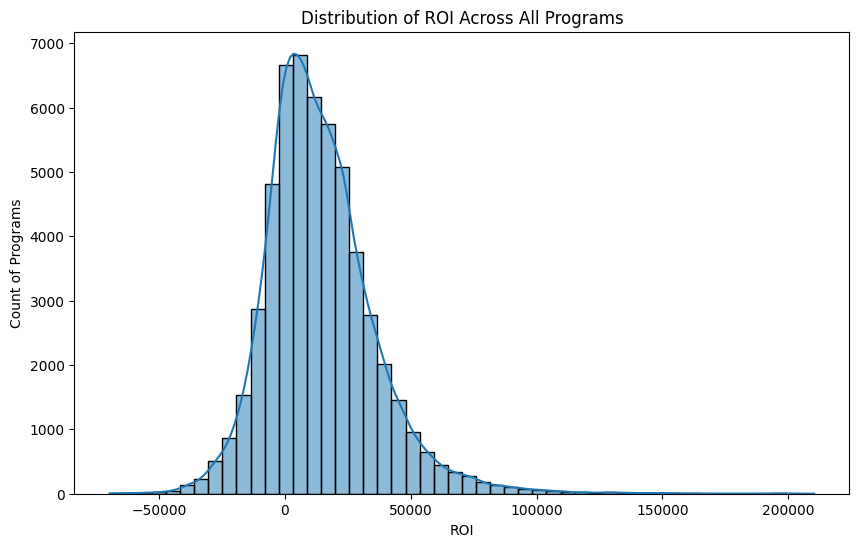

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged_clean["ROI"], kde=True, bins=50)
plt.title("Distribution of ROI Across All Programs")
plt.xlabel("ROI")
plt.ylabel("Count of Programs")
plt.show()

From the graph we can observe that the data is slightly right skewed, and more number of programs have zero ROI. But this necessarily does not mean the data is imbalanced, our dataset looks pretty good

Lets now visualize the top 20 high ROI programs and the universities of these programs

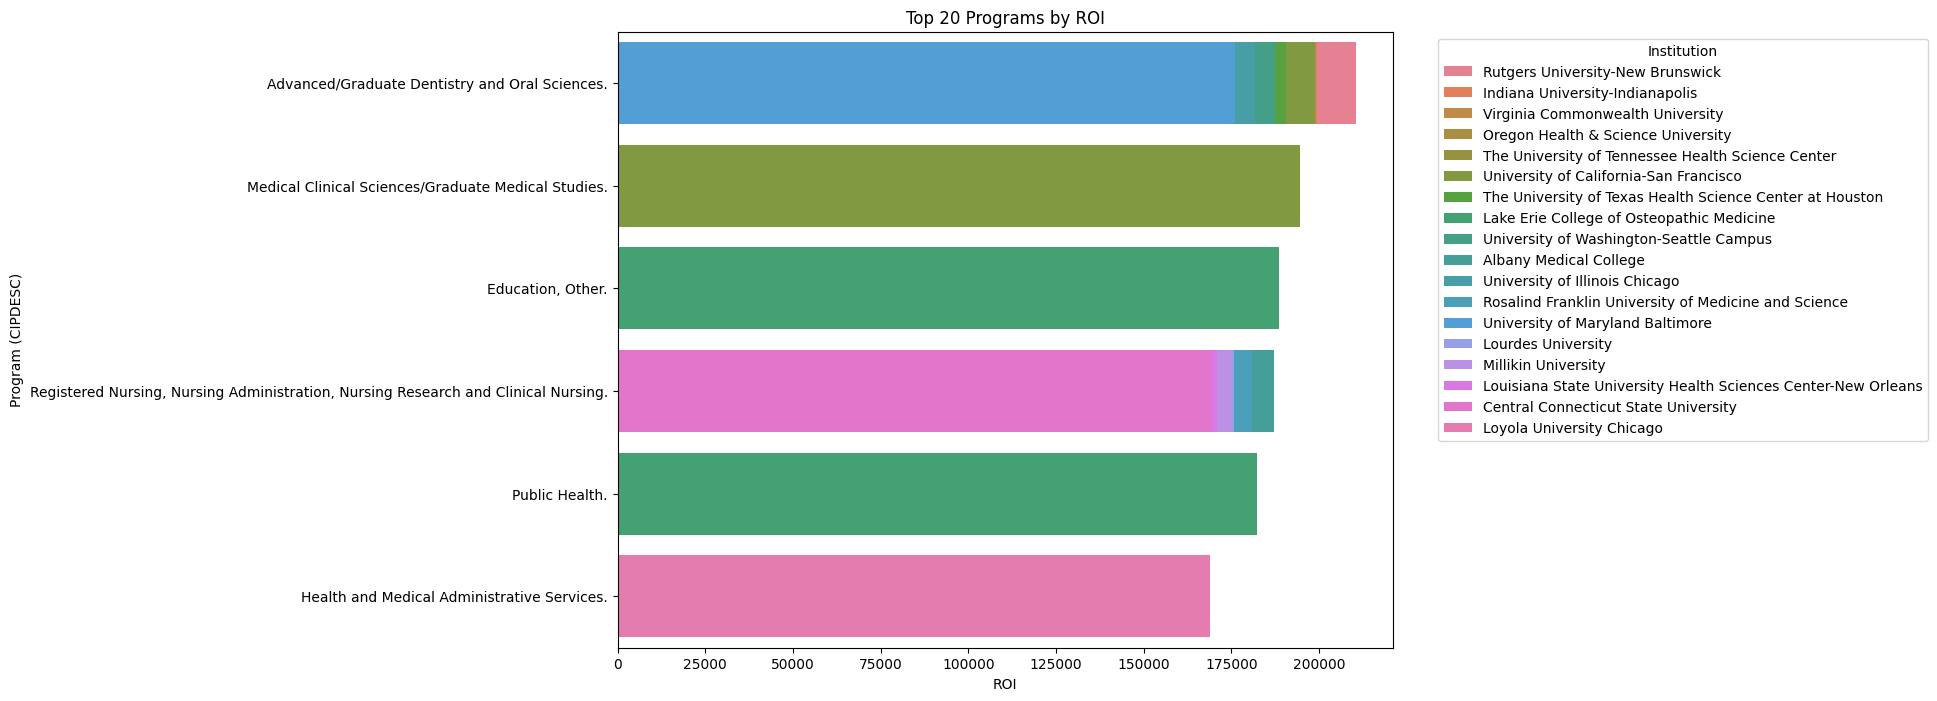

In [ ]:
top20 = df_merged_clean.sort_values("ROI", ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(
    data=top20,
    y="CIPDESC",
    x="ROI",
    hue="INSTNM",
    dodge=False
)
plt.title("Top 20 Programs by ROI")
plt.xlabel("ROI")
plt.ylabel("Program (CIPDESC)")
plt.legend(title="Institution", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Our graph presents the same informaiton got from runing a query but in a more presentable way, we can see that health related studies have a better ROI in general as they dominate in the top 5

Lets look into the distribution of ROI for each degree type

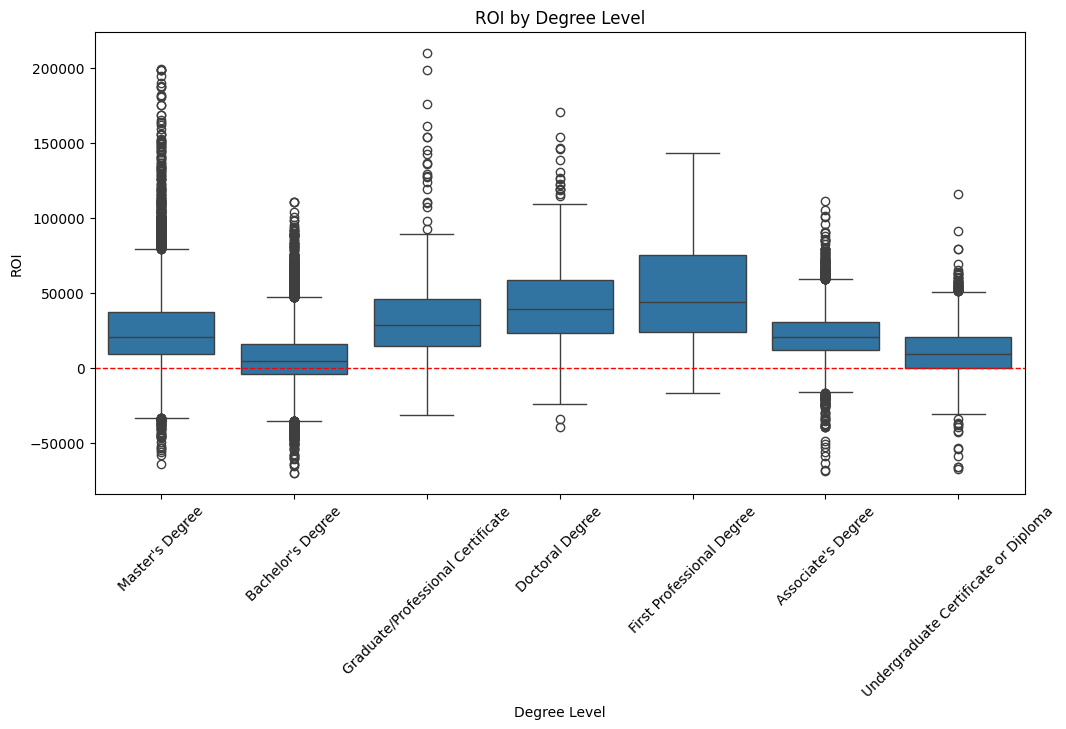

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_merged_clean,
    x="CREDDESC",
    y="ROI"
)
plt.title("ROI by Degree Level")
plt.xlabel("Degree Level")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.show()


From the above graph we are seeing that degrees other than Bachelors and Undergrad certificate or diploma overall are better as the lower quartile never touches the ROI=0 line, but we do have a lot of outliers in all cases. But in general we can say that the prospects are much better after completing a masters program

Lets see how the ROI ranges based on the control(Publoc/provate non profit/private profit) looks like

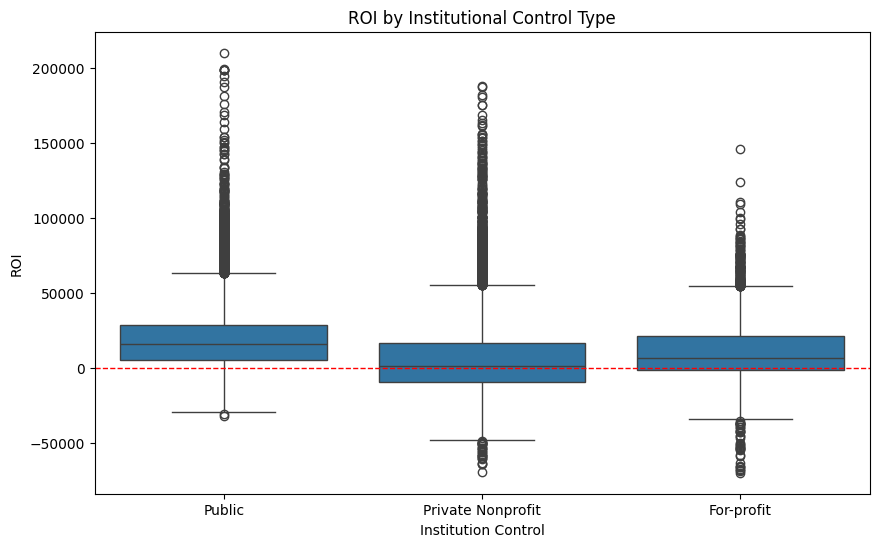

In [ ]:
control_map = {1: "Public", 2: "Private Nonprofit", 3: "For-profit"}
df_plot = df_merged_clean.copy()
df_plot["CONTROL_TYPE"] = df_plot["CONTROL"].map(control_map)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_plot,
    x="CONTROL_TYPE",
    y="ROI"
)
plt.title("ROI by Institutional Control Type")
plt.xlabel("Institution Control")
plt.ylabel("ROI")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.show()


From the graph we can clearly see that Public universities have a better ROI in general as they have very few < 0 points. But this could not be the only factor

Lets visialize compluter related programs and which one has a better ROI overall

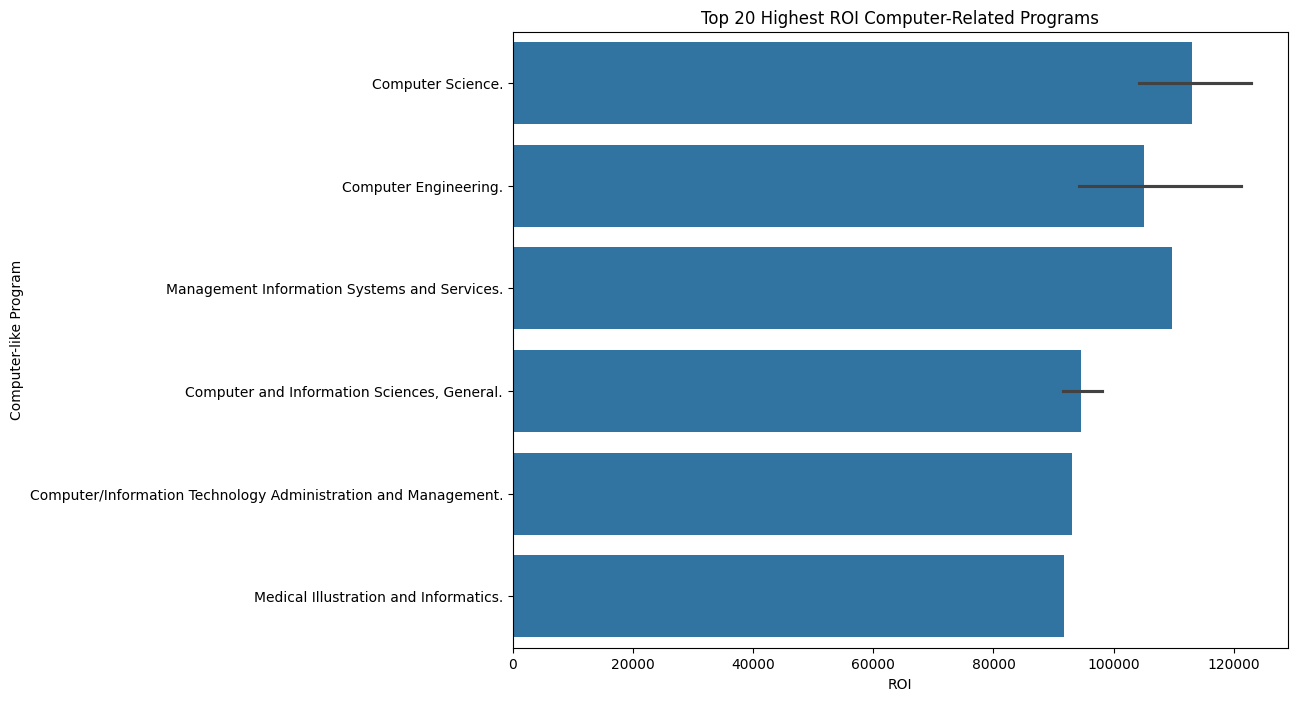

In [ ]:
df_comp = df_merged_clean[
    df_merged_clean["CIPDESC"].str.lower().str.contains(
        "computer|software|information|informatics|cyber|data",
        na=False
    )
]

top_comp = df_comp.sort_values("ROI", ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(
    data=top_comp,
    y="CIPDESC",
    x="ROI"
)
plt.title("Top 20 Highest ROI Computer-Related Programs")
plt.xlabel("ROI")
plt.ylabel("Computer-like Program")
plt.show()

Lets see the correlation between our features

In [ ]:
numeric_df = df_merged_clean.select_dtypes(include=["float64","int64"])
numeric_df.shape

(54938, 21)

In [ ]:
corr_matrix = numeric_df.corr()
corr_matrix

,UNITID,CONTROL,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,MAIN,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_HI_1YR,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,ROI
UNITID,1.000000,0.362747,0.576932,-0.011965,0.055714,-0.001131,-0.190591,-0.525255,0.239830,0.230661,...,0.244698,0.229885,0.192157,0.225791,0.219605,0.219483,0.191404,0.215745,0.240096,0.049998
CONTROL,0.362747,1.000000,0.433035,-0.034527,0.063230,-0.024180,-0.091909,-0.307068,0.244471,0.238480,...,0.250138,0.233987,0.185689,0.225514,0.222182,0.222133,0.184534,0.212921,0.248169,-0.216859
OPEID6,0.576932,0.433035,1.000000,0.039295,0.081055,0.048938,-0.319627,-0.194935,0.221112,0.209431,...,0.212189,0.174865,0.116993,0.146659,0.138732,0.138540,0.104596,0.138289,0.210999,0.007490
IPEDSCOUNT1,-0.011965,-0.034527,0.039295,1.000000,0.008690,0.976730,-0.030127,0.063351,0.363498,0.306397,...,0.286118,0.369695,0.363114,0.317224,0.277590,0.277639,0.293840,0.293954,0.238634,0.076520
CIPCODE,0.055714,0.063230,0.081055,0.008690,1.000000,0.009065,-0.095121,-0.058952,0.029983,0.030754,...,0.040478,0.079975,0.066509,0.075998,0.070678,0.070685,0.070586,0.066334,0.035912,0.071499
IPEDSCOUNT2,-0.001131,-0.024180,0.048938,0.976730,0.009065,1.000000,-0.031209,0.057173,0.366722,0.307368,...,0.286419,0.368541,0.361811,0.313823,0.273967,0.274013,0.287086,0.288502,0.237079,0.072808
CREDLEV,-0.190591,-0.091909,-0.319627,-0.030127,-0.095121,-0.031209,1.000000,0.123581,-0.135256,-0.126560,...,-0.132236,-0.079649,-0.053751,-0.060514,-0.053954,-0.053868,-0.013050,-0.049429,-0.125345,0.246527
MAIN,-0.525255,-0.307068,-0.194935,0.063351,-0.058952,0.057173,0.123581,1.000000,-0.269446,-0.257929,...,-0.275017,-0.302963,-0.252473,-0.289812,-0.278916,-0.278842,-0.231994,-0.260954,-0.263994,-0.051182
EARN_COUNT_NWNE_1YR,0.239830,0.244471,0.221112,0.363498,0.029983,0.366722,-0.135256,-0.269446,1.000000,0.935980,...,0.776653,0.740464,0.646475,0.676499,0.632543,0.632472,0.576809,0.634728,0.766629,-0.027599
EARN_COUNT_NWNE_HI_1YR,0.230661,0.238480,0.209431,0.306397,0.030754,0.307368,-0.126560,-0.257929,0.935980,1.000000,...,0.837202,0.711637,0.572282,0.681909,0.654809,0.654752,0.585912,0.651751,0.835409,-0.029139


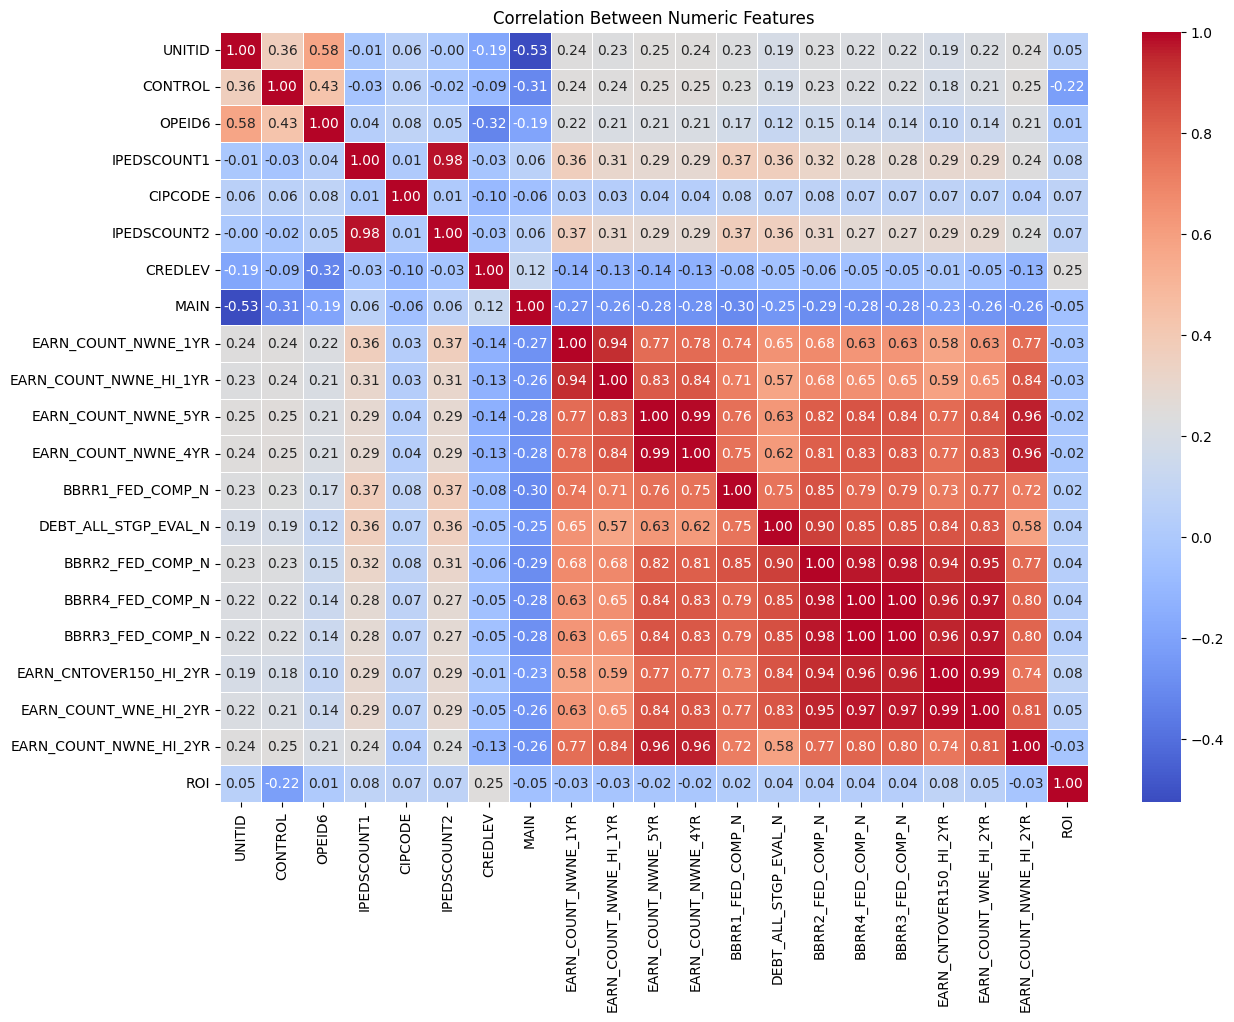

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Between Numeric Features")
plt.show()


We can see that a lot of columns are highly coprrelated, and its pratically impossible to pick out the most important ones, so lets run a few algorithms to calibrate the importance of the fetaures

Lets check the importance of the fetaures using three methods
1. Random Forest Importance: Measures how much each feature decreases impurity (Gini/MSE) across many randomized trees, showing which features the model relies on the most.
2. XGBoost Importance: Measures how often and how effectively each feature is used to reduce error across boosted decision trees, capturing strong non-linear and interaction effects.
3. PCA: PCA reduces your features into a smaller number of components that capture the maximum variance in the data.

Data preparation for feature importance

In [ ]:
df_merged_clean.columns.tolist()

['UNITID',
 'INSTNM',
 'CONTROL',
 'OPEID6',
 'IPEDSCOUNT1',
 'CIPCODE',
 'IPEDSCOUNT2',
 'CREDLEV',
 'CREDDESC',
 'CIPDESC',
 'MAIN',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'BBRR2_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'ROI']

In [ ]:
numeric_cols = df_merged_clean.select_dtypes(include=["float64","int64"]).columns.tolist()
numeric_cols

['UNITID',
 'CONTROL',
 'OPEID6',
 'IPEDSCOUNT1',
 'CIPCODE',
 'IPEDSCOUNT2',
 'CREDLEV',
 'MAIN',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'BBRR2_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'ROI']

In [ ]:
numeric_cols.remove("ROI")
numeric_cols

['UNITID',
 'CONTROL',
 'OPEID6',
 'IPEDSCOUNT1',
 'CIPCODE',
 'IPEDSCOUNT2',
 'CREDLEV',
 'MAIN',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'BBRR2_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR']

In [ ]:
len(df_merged_clean.columns.tolist())

24

In [ ]:
len(numeric_cols)

20

The only column missing is INSTNM which is the institute name, since we have the OPEID6 to for now we'll run the algorithm for the numeric columns alone. We also dont need CREDDESC, CIPDESC as we have CREDLEV and CIPCODE as their equivalent. We also have to drop UNITID as it doesn't make any sense with respet to our problem statement

## Outlier detection and feature selection

Lets first detect outliers and clean our dataset further

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# numeric_cols

X = df_merged_clean.drop(['UNITID', 'INSTNM', 'CREDDESC', 'CIPDESC', 'ROI'], axis=True)
y = df_merged_clean["ROI"]

Outlier detection

In [ ]:
iso = IsolationForest(contamination=0.05).fit(X)
mask = iso.predict(X) == 1

In [ ]:
X = X[mask]
y = y[mask]

In [ ]:
X.shape[0]

52191

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


After removing the outliers we have 50439 rows

Random Forest

In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

feature_importance_df


,feature,importance
3,CIPCODE,0.322115
5,CREDLEV,0.169589
0,CONTROL,0.098404
1,OPEID6,0.072138
16,EARN_CNTOVER150_HI_2YR,0.065448
2,IPEDSCOUNT1,0.034758
4,IPEDSCOUNT2,0.032526
17,EARN_COUNT_WNE_HI_2YR,0.024923
13,BBRR2_FED_COMP_N,0.023553
11,BBRR1_FED_COMP_N,0.022413


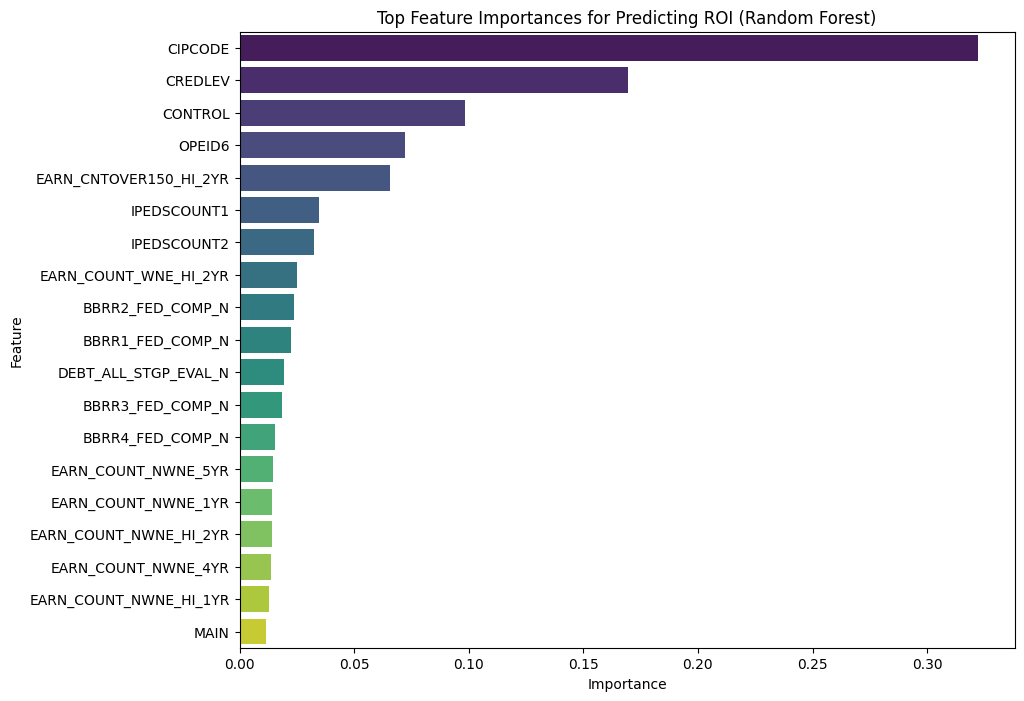

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(
    data=feature_importance_df.head(X_train.shape[1]),
    x="importance",
    y="feature",
    palette="viridis",
    hue="feature",
    legend=False
)
plt.title("Top Feature Importances for Predicting ROI (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

XGBoost

In [ ]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05)
xgb.fit(X_train, y_train)

xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False)
xgb_importance_df = (
    xgb_importance
    .reset_index()
    .rename(columns={"index": "feature", 0: "importance"})
)

xgb_importance_df = xgb_importance_df.sort_values("importance", ascending=False)
xgb_importance_df

,feature,importance
0,CREDLEV,0.204098
1,CONTROL,0.182664
2,CIPCODE,0.146686
3,MAIN,0.086039
4,BBRR3_FED_COMP_N,0.068639
5,EARN_CNTOVER150_HI_2YR,0.064106
6,BBRR4_FED_COMP_N,0.037207
7,EARN_COUNT_WNE_HI_2YR,0.030455
8,OPEID6,0.027007
9,EARN_COUNT_NWNE_HI_2YR,0.022049


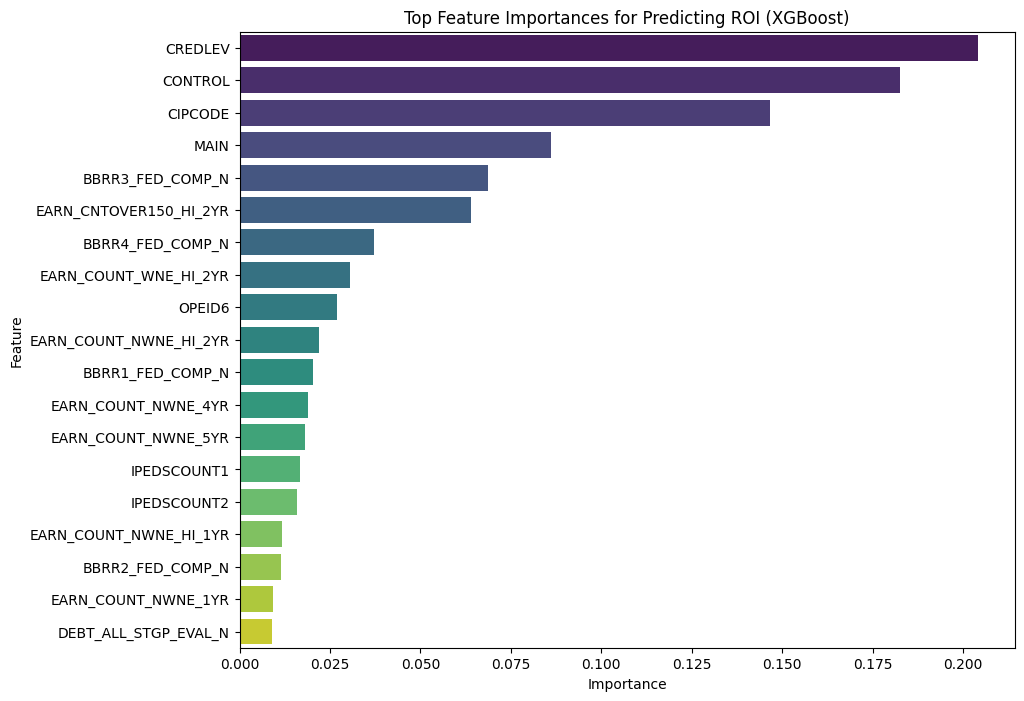

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(
    data=xgb_importance_df,
    x="importance",
    y="feature",
    palette="viridis",
    hue="feature",
    legend=False
)
plt.title("Top Feature Importances for Predicting ROI (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

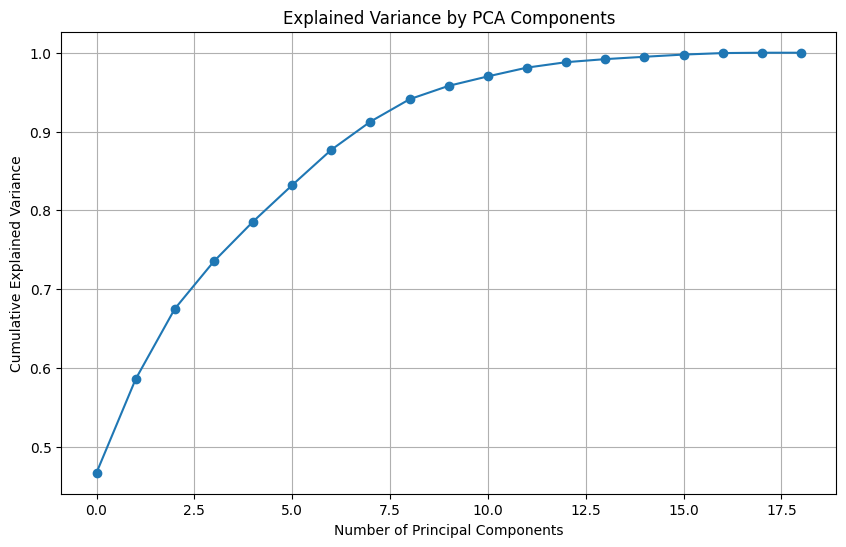

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

In [ ]:
loadings = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,
    index=[f"PC{i+1}" for i in range(len(X_train.columns))]
)

loadings.head()


,CONTROL,OPEID6,IPEDSCOUNT1,CIPCODE,IPEDSCOUNT2,CREDLEV,MAIN,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_HI_1YR,EARN_COUNT_NWNE_5YR,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR
PC1,0.047360,0.057031,0.193789,0.024017,0.190793,-0.021777,-0.068123,0.228233,0.227759,0.260018,0.259598,0.294233,0.279223,0.307310,0.307888,0.307800,0.285827,0.302525,0.232720
PC2,0.295716,0.382538,-0.173161,0.019936,-0.172124,-0.297821,-0.160118,0.235932,0.282464,0.283221,0.295956,-0.159229,-0.177378,-0.151007,-0.139740,-0.140191,-0.211511,-0.139415,0.325029
PC3,-0.302362,-0.072094,0.502603,-0.106013,0.501204,-0.131135,0.369058,0.189523,0.147868,0.078042,0.079099,-0.090114,-0.020423,-0.155062,-0.198954,-0.199067,-0.158974,-0.137420,0.094052
PC4,0.178289,0.411384,0.200015,0.594955,0.209687,-0.437489,0.007295,-0.148981,-0.217134,-0.107761,-0.139559,0.082179,0.097330,0.033722,0.007398,0.007094,0.007014,-0.005313,-0.227164
PC5,0.560877,0.350095,0.210335,-0.519585,0.224378,0.277750,-0.082506,0.052080,-0.053894,-0.141584,-0.146386,0.098597,0.123575,0.002742,-0.043800,-0.043880,-0.058921,-0.074907,-0.171246


In [ ]:
loadings.loc["PC1"].abs().sort_values(ascending=False).head(10)


,PC1
BBRR4_FED_COMP_N,0.307888
BBRR3_FED_COMP_N,0.307800
BBRR2_FED_COMP_N,0.307310
EARN_COUNT_WNE_HI_2YR,0.302525
BBRR1_FED_COMP_N,0.294233
EARN_CNTOVER150_HI_2YR,0.285827
DEBT_ALL_STGP_EVAL_N,0.279223
EARN_COUNT_NWNE_5YR,0.260018
EARN_COUNT_NWNE_4YR,0.259598
EARN_COUNT_NWNE_HI_2YR,0.232720


In [ ]:
loadings.loc["PC2"].abs().sort_values(ascending=False).head(10)

,PC2
OPEID6,0.382538
EARN_COUNT_NWNE_HI_2YR,0.325029
CREDLEV,0.297821
EARN_COUNT_NWNE_4YR,0.295956
CONTROL,0.295716
EARN_COUNT_NWNE_5YR,0.283221
EARN_COUNT_NWNE_HI_1YR,0.282464
EARN_COUNT_NWNE_1YR,0.235932
EARN_CNTOVER150_HI_2YR,0.211511
DEBT_ALL_STGP_EVAL_N,0.177378


Lets compare the fetures selected by each method

In [ ]:
features_rf = feature_importance_df.head(10)["feature"].tolist()
features_rf.sort()
features_xgb = xgb_importance_df.head(10)["feature"].tolist()
features_xgb.sort()
features_pca = loadings.loc["PC1"].abs().sort_values(ascending=False).head(10).index.tolist()
features_pca.sort()

In [ ]:
features_rf

['BBRR1_FED_COMP_N',
 'BBRR2_FED_COMP_N',
 'CIPCODE',
 'CONTROL',
 'CREDLEV',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'OPEID6']

In [ ]:
features_xgb

['BBRR3_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'CIPCODE',
 'CONTROL',
 'CREDLEV',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'MAIN',
 'OPEID6']

In [ ]:
 features_pca

['BBRR1_FED_COMP_N',
 'BBRR2_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_NWNE_4YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR']

PCA is not the ideal colution as it completely disregards OPEID6, which is the most important identifier. So lets rule out PCA

Now between random forest and xg boost, lets run a quick training and check the rmse scores

In [ ]:
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)

    r2  = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    # SMAPE handles negative or zero values safely
    def smape(y_true, y_pred):
        return np.mean(
            2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-9)
        ) * 100

    smape_val = smape(y_test, preds)
    accuracy = 100 - smape_val

    return {
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse,
        "SMAPE%": smape_val,
        "Accuracy%": accuracy
    }


In [ ]:
rf_metrics_train  = evaluate_model(rf, X_train, y_train)
xgb_metrics_train = evaluate_model(xgb, X_train, y_train)

print("Random Forest Metrics:\n", rf_metrics_train)
print("\nXGBoost Metrics:\n", xgb_metrics_train)


Random Forest Metrics:
 {'R2': 0.9584388398530549, 'MAE': 3021.8461855997257, 'RMSE': np.float64(4465.536630754894), 'SMAPE%': np.float64(34.8748822315955), 'Accuracy%': np.float64(65.1251177684045)}

XGBoost Metrics:
 {'R2': 0.7896896357077946, 'MAE': 7067.692513134806, 'RMSE': np.float64(10045.236431091842), 'SMAPE%': np.float64(65.49101837510568), 'Accuracy%': np.float64(34.50898162489432)}


In [ ]:
rf_metrics_test  = evaluate_model(rf, X_test, y_test)
xgb_metrics_test = evaluate_model(xgb, X_test, y_test)

print("Random Forest Metrics:\n", rf_metrics_test)
print("\nXGBoost Metrics:\n", xgb_metrics_test)


Random Forest Metrics:
 {'R2': 0.6910825946647731, 'MAE': 8114.832460984735, 'RMSE': np.float64(12066.999820214447), 'SMAPE%': np.float64(70.55760499634928), 'Accuracy%': np.float64(29.442395003650716)}

XGBoost Metrics:
 {'R2': 0.7200493182080494, 'MAE': 7825.682718448363, 'RMSE': np.float64(11487.324298317455), 'SMAPE%': np.float64(69.4086574235754), 'Accuracy%': np.float64(30.591342576424594)}


From the above results its clear that the randomforest algorithm works better for our data with an accuracy of 65% whereas XGBoost has only 35% accuracy. The rmse of random forest is less than 1/2 of xgboost

Therefore lets choose the top 10 features selected by random forest

Both perform really low on test data. We might have to use a better regression model, but for now we are going to use the features selected by random forest for data modelling

## Final data

In [ ]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54938 entries, 0 to 54937
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNITID                  54938 non-null  int64  
 1   INSTNM                  54938 non-null  object 
 2   CONTROL                 54938 non-null  int64  
 3   OPEID6                  54938 non-null  int64  
 4   IPEDSCOUNT1             54938 non-null  float64
 5   CIPCODE                 54938 non-null  float64
 6   IPEDSCOUNT2             54938 non-null  float64
 7   CREDLEV                 54938 non-null  float64
 8   CREDDESC                54938 non-null  object 
 9   CIPDESC                 54938 non-null  object 
 10  MAIN                    54938 non-null  float64
 11  EARN_COUNT_NWNE_1YR     54938 non-null  int64  
 12  EARN_COUNT_NWNE_HI_1YR  54938 non-null  int64  
 13  EARN_COUNT_NWNE_5YR     54938 non-null  int64  
 14  EARN_COUNT_NWNE_4YR     54938 non-null

In [ ]:
df_final = df_merged_clean[features_rf + ['ROI']]

In [ ]:
df_final.head()

,BBRR1_FED_COMP_N,BBRR2_FED_COMP_N,CIPCODE,CONTROL,CREDLEV,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,IPEDSCOUNT1,IPEDSCOUNT2,OPEID6,ROI
0,12,16,403.0,1,5.0,12,12,8.0,6.0,1002,21299.0
1,48,18,1002.0,1,3.0,6,12,23.0,16.0,1002,-5859.0
2,46,26,1101.0,1,3.0,29,31,20.0,37.0,1002,26146.0
3,10,13,1101.0,1,5.0,11,11,9.0,7.0,1002,3724.0
4,12,15,1304.0,1,5.0,8,11,1.0,1.0,1002,24270.0


In [ ]:
df_final.describe()

,BBRR1_FED_COMP_N,BBRR2_FED_COMP_N,CIPCODE,CONTROL,CREDLEV,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,IPEDSCOUNT1,IPEDSCOUNT2,OPEID6,ROI
count,54938.000000,54938.000000,54938.000000,54938.000000,54938.000000,54938.000000,54938.000000,54938.000000,54938.000000,54938.000000,54938.000000
mean,82.575485,84.172194,3543.928902,1.511467,3.144909,60.121082,72.682970,65.720230,66.318832,5960.270869,14033.986967
std,235.927250,263.105249,1694.442795,0.664216,1.319056,204.500390,236.275016,155.689632,164.885156,8295.242449,21868.242132
min,10.000000,10.000000,100.000000,1.000000,1.000000,0.000000,11.000000,0.000000,0.000000,1002.000000,-69696.000000
25%,14.000000,16.000000,1506.000000,1.000000,3.000000,12.000000,15.000000,15.000000,14.000000,2002.000000,-122.750000
50%,30.000000,30.000000,4301.000000,1.000000,3.000000,23.000000,27.000000,30.000000,29.000000,3023.000000,11256.000000
75%,70.000000,69.000000,5110.000000,2.000000,3.000000,51.000000,60.000000,66.000000,66.000000,3988.000000,25157.250000
max,9964.000000,9351.000000,5401.000000,3.000000,8.000000,8315.000000,9437.000000,9082.000000,9606.000000,43006.000000,210385.000000


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54938 entries, 0 to 54937
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BBRR1_FED_COMP_N        54938 non-null  int64  
 1   BBRR2_FED_COMP_N        54938 non-null  int64  
 2   CIPCODE                 54938 non-null  float64
 3   CONTROL                 54938 non-null  int64  
 4   CREDLEV                 54938 non-null  float64
 5   EARN_CNTOVER150_HI_2YR  54938 non-null  int64  
 6   EARN_COUNT_WNE_HI_2YR   54938 non-null  int64  
 7   IPEDSCOUNT1             54938 non-null  float64
 8   IPEDSCOUNT2             54938 non-null  float64
 9   OPEID6                  54938 non-null  int64  
 10  ROI                     54938 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 4.6 MB


In [ ]:
df_final.isna().sum()

,0
BBRR1_FED_COMP_N,0
BBRR2_FED_COMP_N,0
CIPCODE,0
CONTROL,0
CREDLEV,0
EARN_CNTOVER150_HI_2YR,0
EARN_COUNT_WNE_HI_2YR,0
IPEDSCOUNT1,0
IPEDSCOUNT2,0
OPEID6,0


# Data modeling

## Linear regression
Lets first prepare the data by scalling it, lets first do linear regression the increase complexity till we have a good trad-off between bias and variance. Lets then move on to regression with penalty

Lets first prepare the data

In [ ]:
X = df_final.drop(columns=["ROI"])
y = df_final["ROI"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
def evaluate_regression(model, X_test, y_test):
    preds = model.predict(X_test)

    r2  = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    # Normalized RMSE accuracy
    value_range = y_test.max() - y_test.min()
    accuracy = 1 - (rmse / value_range)

    print("R²:", r2)
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("Accuracy (Normalized RMSE):", accuracy * 100, "%")
    print("-" * 40)



Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.001, max_iter=10000)

In [ ]:
evaluate_regression(lr, X_test_scaled, y_test)
evaluate_regression(ridge, X_test_scaled, y_test)
evaluate_regression(lasso, X_test_scaled, y_test)


R²: 0.1753298131847636
MAE: 14963.808510291268
RMSE: 19973.65551105167
Accuracy (Normalized RMSE): 92.8686146111119 %
----------------------------------------
R²: 0.17533904472132356
MAE: 14963.9940635569
RMSE: 19973.543716027398
Accuracy (Normalized RMSE): 92.86865452635938 %
----------------------------------------
R²: 0.17532985822812575
MAE: 14963.808829277443
RMSE: 19973.654965572627
Accuracy (Normalized RMSE): 92.86861480586951 %
----------------------------------------


All models seem to be having the same accuracy, the probable reason why penalty is not helping with increasing the accuracy is probably because we have already selected the most important features so penalty is not really doing anything much here

## LGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
lgb_gpu = lgb.LGBMRegressor(
    device="gpu",
    boosting_type="gbdt",
    objective="regression",
    random_state=42
)


In [ ]:
param_grid = {
    "num_leaves": [31, 63],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [200, 400],
    "subsample": [0.7, 1.0],
}

In [ ]:
grid = GridSearchCV(
    estimator=lgb_gpu,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3,
    n_jobs=-1
)


In [ ]:
%%time
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1997
[LightGBM] [Info] Number of data points in the train set: 43950, number of used features: 10
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (0.50 MB) transferred to GPU in 0.001070 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 14015.106234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=5,
             estimator=LGBMRegressor(device='gpu', objective='regression',
                                     random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': [-1, 10, 20], 'n_estimators': [200, 400],
                         'num_leaves': [31, 63], 'subsample': [0.7, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
best_lgb = grid.best_estimator_
preds = best_lgb.predict(X_test)

r2  = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Best Parameters:", grid.best_params_)
print("R square:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400, 'num_leaves': 63, 'subsample': 1.0}
R square: 0.7447707151619731
MAE: 7379.360325180832
RMSE: 11111.755067796164


Now the R square has improved from 0.17 to 0.74, this means our model is able to explain 74% of the variation in ROI. This is amazing.

## MLPRegressor

In [ ]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
from tqdm.auto import tqdm

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

Using: cuda


In [ ]:
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).to(device)

X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).to(device)

train_ds = TensorDataset(X_train_t, y_train_t)
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self, layers=[128, 64]):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(X_train.shape[1], layers[0]),
            nn.ReLU(),
            nn.Linear(layers[0], layers[1]),
            nn.ReLU(),
            nn.Linear(layers[1], 1)
        )

    def forward(self, x):
        return self.net(x).flatten()


In [ ]:
def train_model(layers, lr=0.001, epochs=50):
    model = MLP(layers).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    losses = []

    for epoch in tqdm(range(epochs), desc="Epochs"):
        batch_losses = []

        for xb, yb in tqdm(train_dl, desc=f"Epoch {epoch+1}", leave=False):
            opt.zero_grad()
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            opt.step()
            batch_losses.append(loss.item())

        epoch_loss = np.mean(batch_losses)
        losses.append(epoch_loss)
        tqdm.write(f"Epoch {epoch+1}/{epochs} Loss={epoch_loss:.4f}")

    return model, losses

In [ ]:
configs = [
    {"layers": [128, 64], "lr": 0.001},
    {"layers": [256, 128], "lr": 0.001},
]

best_r2 = -999
best_model = None

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for cfg in tqdm(configs, desc="HParam Search"):
    model, losses = train_model(cfg["layers"], lr=cfg["lr"], epochs=50)

    # Predict on GPU, move to CPU
    pred = model(X_test_t).detach().cpu().numpy()
    true = y_test_t.cpu().numpy()

    r2 = r2_score(true, pred)
    tqdm.write(f"Config {cfg} → R2: {r2}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model


HParam Search:   0%|          | 0/2 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 1/50 Loss=671655141.2093


Epoch 2:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 2/50 Loss=641546595.1628


Epoch 3:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 3/50 Loss=554305829.9535


Epoch 4:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 4/50 Loss=463357301.3953


Epoch 5:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 5/50 Loss=422311457.4884


Epoch 6:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 6/50 Loss=406712970.4186


Epoch 7:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 7/50 Loss=397200794.6047


Epoch 8:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 8/50 Loss=389613521.8605


Epoch 9:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 9/50 Loss=383912944.5581


Epoch 10:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 10/50 Loss=379115339.4419


Epoch 11:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 11/50 Loss=374858398.1395


Epoch 12:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 12/50 Loss=371152206.5116


Epoch 13:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 13/50 Loss=367574727.5349


Epoch 14:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 14/50 Loss=364512656.1860


Epoch 15:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 15/50 Loss=361667544.7442


Epoch 16:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 16/50 Loss=359173515.9070


Epoch 17:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 17/50 Loss=356778660.2791


Epoch 18:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 18/50 Loss=354682860.6512


Epoch 19:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 19/50 Loss=352847729.5814


Epoch 20:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 20/50 Loss=351363122.6977


Epoch 21:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 21/50 Loss=350008421.5814


Epoch 22:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 22/50 Loss=348791423.7209


Epoch 23:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 23/50 Loss=347574254.6977


Epoch 24:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 24/50 Loss=346676855.0698


Epoch 25:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 25/50 Loss=346099361.6744


Epoch 26:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 26/50 Loss=345474007.5349


Epoch 27:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 27/50 Loss=344693444.3721


Epoch 28:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 28/50 Loss=344225829.9535


Epoch 29:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 29/50 Loss=343461825.6744


Epoch 30:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 30/50 Loss=342703008.3721


Epoch 31:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 31/50 Loss=342292656.0000


Epoch 32:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 32/50 Loss=341376329.6744


Epoch 33:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 33/50 Loss=340861531.1628


Epoch 34:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 34/50 Loss=340249648.0930


Epoch 35:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 35/50 Loss=339557138.6977


Epoch 36:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 36/50 Loss=338735842.9767


Epoch 37:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 37/50 Loss=338250217.2093


Epoch 38:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 38/50 Loss=337678725.7674


Epoch 39:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 39/50 Loss=337074105.2093


Epoch 40:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 40/50 Loss=336517452.7442


Epoch 41:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 41/50 Loss=335548882.4186


Epoch 42:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 42/50 Loss=334727779.2558


Epoch 43:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 43/50 Loss=333983511.6279


Epoch 44:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 44/50 Loss=333134152.3721


Epoch 45:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 45/50 Loss=332546574.4186


Epoch 46:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 46/50 Loss=332206468.0000


Epoch 47:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 47/50 Loss=331162792.9302


Epoch 48:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 48/50 Loss=330714714.0465


Epoch 49:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 49/50 Loss=329908049.0233


Epoch 50:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 50/50 Loss=329084715.4419
Config {'layers': [128, 64], 'lr': 0.001} → R2: 0.30678999423980713


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 1/50 Loss=666415176.5581


Epoch 2:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 2/50 Loss=580361695.6279


Epoch 3:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 3/50 Loss=445827486.6977


Epoch 4:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 4/50 Loss=403711343.6279


Epoch 5:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 5/50 Loss=389652898.6047


Epoch 6:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 6/50 Loss=380438602.7907


Epoch 7:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 7/50 Loss=373222682.7907


Epoch 8:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 8/50 Loss=367363410.7907


Epoch 9:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 9/50 Loss=362656626.7907


Epoch 10:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 10/50 Loss=358835853.3023


Epoch 11:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 11/50 Loss=354952403.7209


Epoch 12:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 12/50 Loss=352087592.4651


Epoch 13:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 13/50 Loss=349395225.7674


Epoch 14:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 14/50 Loss=346996190.3256


Epoch 15:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 15/50 Loss=345199490.6047


Epoch 16:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 16/50 Loss=344047396.3721


Epoch 17:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 17/50 Loss=342421521.3023


Epoch 18:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 18/50 Loss=341143244.8372


Epoch 19:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 19/50 Loss=339770652.0930


Epoch 20:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 20/50 Loss=338203114.3256


Epoch 21:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 21/50 Loss=336943814.6047


Epoch 22:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 22/50 Loss=335515124.5581


Epoch 23:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 23/50 Loss=333933968.4651


Epoch 24:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 24/50 Loss=332427758.4186


Epoch 25:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 25/50 Loss=330378915.3488


Epoch 26:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 26/50 Loss=328292873.4884


Epoch 27:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 27/50 Loss=325758234.0465


Epoch 28:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 28/50 Loss=323677365.5814


Epoch 29:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 29/50 Loss=321327686.6977


Epoch 30:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 30/50 Loss=319129239.8140


Epoch 31:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 31/50 Loss=317698143.8140


Epoch 32:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 32/50 Loss=315423447.6279


Epoch 33:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 33/50 Loss=313829147.1628


Epoch 34:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 34/50 Loss=312351610.3256


Epoch 35:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 35/50 Loss=310856588.3721


Epoch 36:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 36/50 Loss=309557232.5581


Epoch 37:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 37/50 Loss=308534709.1163


Epoch 38:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 38/50 Loss=307199638.6977


Epoch 39:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 39/50 Loss=306095166.0465


Epoch 40:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 40/50 Loss=305186720.6512


Epoch 41:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 41/50 Loss=304200938.7907


Epoch 42:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 42/50 Loss=303540225.2093


Epoch 43:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 43/50 Loss=302320890.6977


Epoch 44:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 44/50 Loss=301592005.1163


Epoch 45:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 45/50 Loss=301166562.9767


Epoch 46:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 46/50 Loss=300093821.0233


Epoch 47:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 47/50 Loss=299371244.4651


Epoch 48:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 48/50 Loss=298395154.2326


Epoch 49:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 49/50 Loss=297882242.3256


Epoch 50:   0%|          | 0/172 [00:00<?, ?it/s]

Epoch 50/50 Loss=297081978.1395
Config {'layers': [256, 128], 'lr': 0.001} → R2: 0.37285399436950684


In [ ]:
pred = best_model(X_test_t).detach().cpu().numpy()
true = y_test_t.cpu().numpy()

print("Final R²:", r2_score(true, pred))
print("MAE:", mean_absolute_error(true, pred))
print("RMSE:", np.sqrt(mean_squared_error(true, pred)))

Final R²: 0.37285399436950684
MAE: 12491.6416015625
RMSE: 17418.138591709507


The MLPRegressor (Multi-Layer Perceptron) is a fully connected feed-forward neural network.
It is capable of learning non-linear patterns, interactions, and complex feature relationships.
However, neural networks are not the best models for tabular structured data, and the results reflect this limitation.